# Initial Set Up


In [1]:
# load google drive content
from google.colab import drive
drive.mount('/content/drive')

# view files in DeePore folder
%cd /content/drive/MyDrive/hb-final-project
!ls -a

import DeePore as dp
import numpy as np
import h5py
import matplotlib.pyplot as plt
# import updatedDP as udp
import deeporerevised as dpr
import os

Mounted at /content/drive
/content/drive/MyDrive/hb-final-project
correlated_1_results_20epoch_6slice.txt  .git			   propertynum.ipynb
correlated_1_results_20epoch.txt	 images			   __pycache__
correlated_1_results_50epoch_3slice.txt  just_all_results.txt	   README.md
correlated_1_results_50epoch_6slice.txt  just_range_results.txt    results.txt
correlated_1_results.txt		 just_singles_results.txt  sample_gt.txt
correlated_2_results_20epoch_6slice.txt  Logs			   slicenum.ipynb
correlated_2_results_20epoch.txt	 minmax_1.npy		   Tested_Data_Model1_1.mat
correlated_2_results_50epoch_3slice.txt  minmax_2.npy		   Tested_Data_Model1.mat
correlated_2_results.txt		 minmax.npy		   Tested_Data_Model2_1.mat
Data					 Model1.h5		   Tested_Data_Model2.mat
DeePorePractice				 Model2.h5		   Tested_Data_Model3_1.mat
DeePore.py				 Model3_1.h5		   Tested_Data_Model3_2.mat
DeePoreRevised.ipynb			 Model3_2.h5		   Tested_Data_Model3.mat
deeporerevised.py			 Model3.h5		   Tested_Data_Model4.mat
Demo1.py				 

In [2]:
dataset ='/content/drive/MyDrive/Project/DeePore_Dataset.h5'
dataset_1 = '/content/drive/MyDrive/Project/DeePore_Compact_Data.h5'
dataset_2 = '/content/drive/MyDrive/Project/DeePore_Compact_Data_2.h5'

# dpr.trainmodel doesn't create Log directory initially
# creating Log directory here to prevent errors
log_dir = '/content/drive/MyDrive/hb-final-project/Logs'
os.makedirs(log_dir, exist_ok=True)

# Grouping with normal num of properties

Checking the data for outliers. Please wait...
checking sample: 0
checking sample: 100
checking sample: 200
checking sample: 300
checking sample: 400
checking sample: 500
checking sample: 600
checking sample: 700
checking sample: 800
checking sample: 900
checking sample: 1000
checking sample: 1100
checking sample: 1200
checking sample: 1300
checking sample: 1400
checking sample: 1500
checking sample: 1600
checking sample: 1700
checking sample: 1800
checking sample: 1900
checking sample: 2000
checking sample: 2100
checking sample: 2200
checking sample: 2300
checking sample: 2400
checking sample: 2500
checking sample: 2600
checking sample: 2700
checking sample: 2800
checking sample: 2900
checking sample: 3000
checking sample: 3100
checking sample: 3200
checking sample: 3300
checking sample: 3400
checking sample: 3500
checking sample: 3600
checking sample: 3700
checking sample: 3800
checking sample: 3900
checking sample: 4000
checking sample: 4100
checking sample: 4200
checking sample: 43

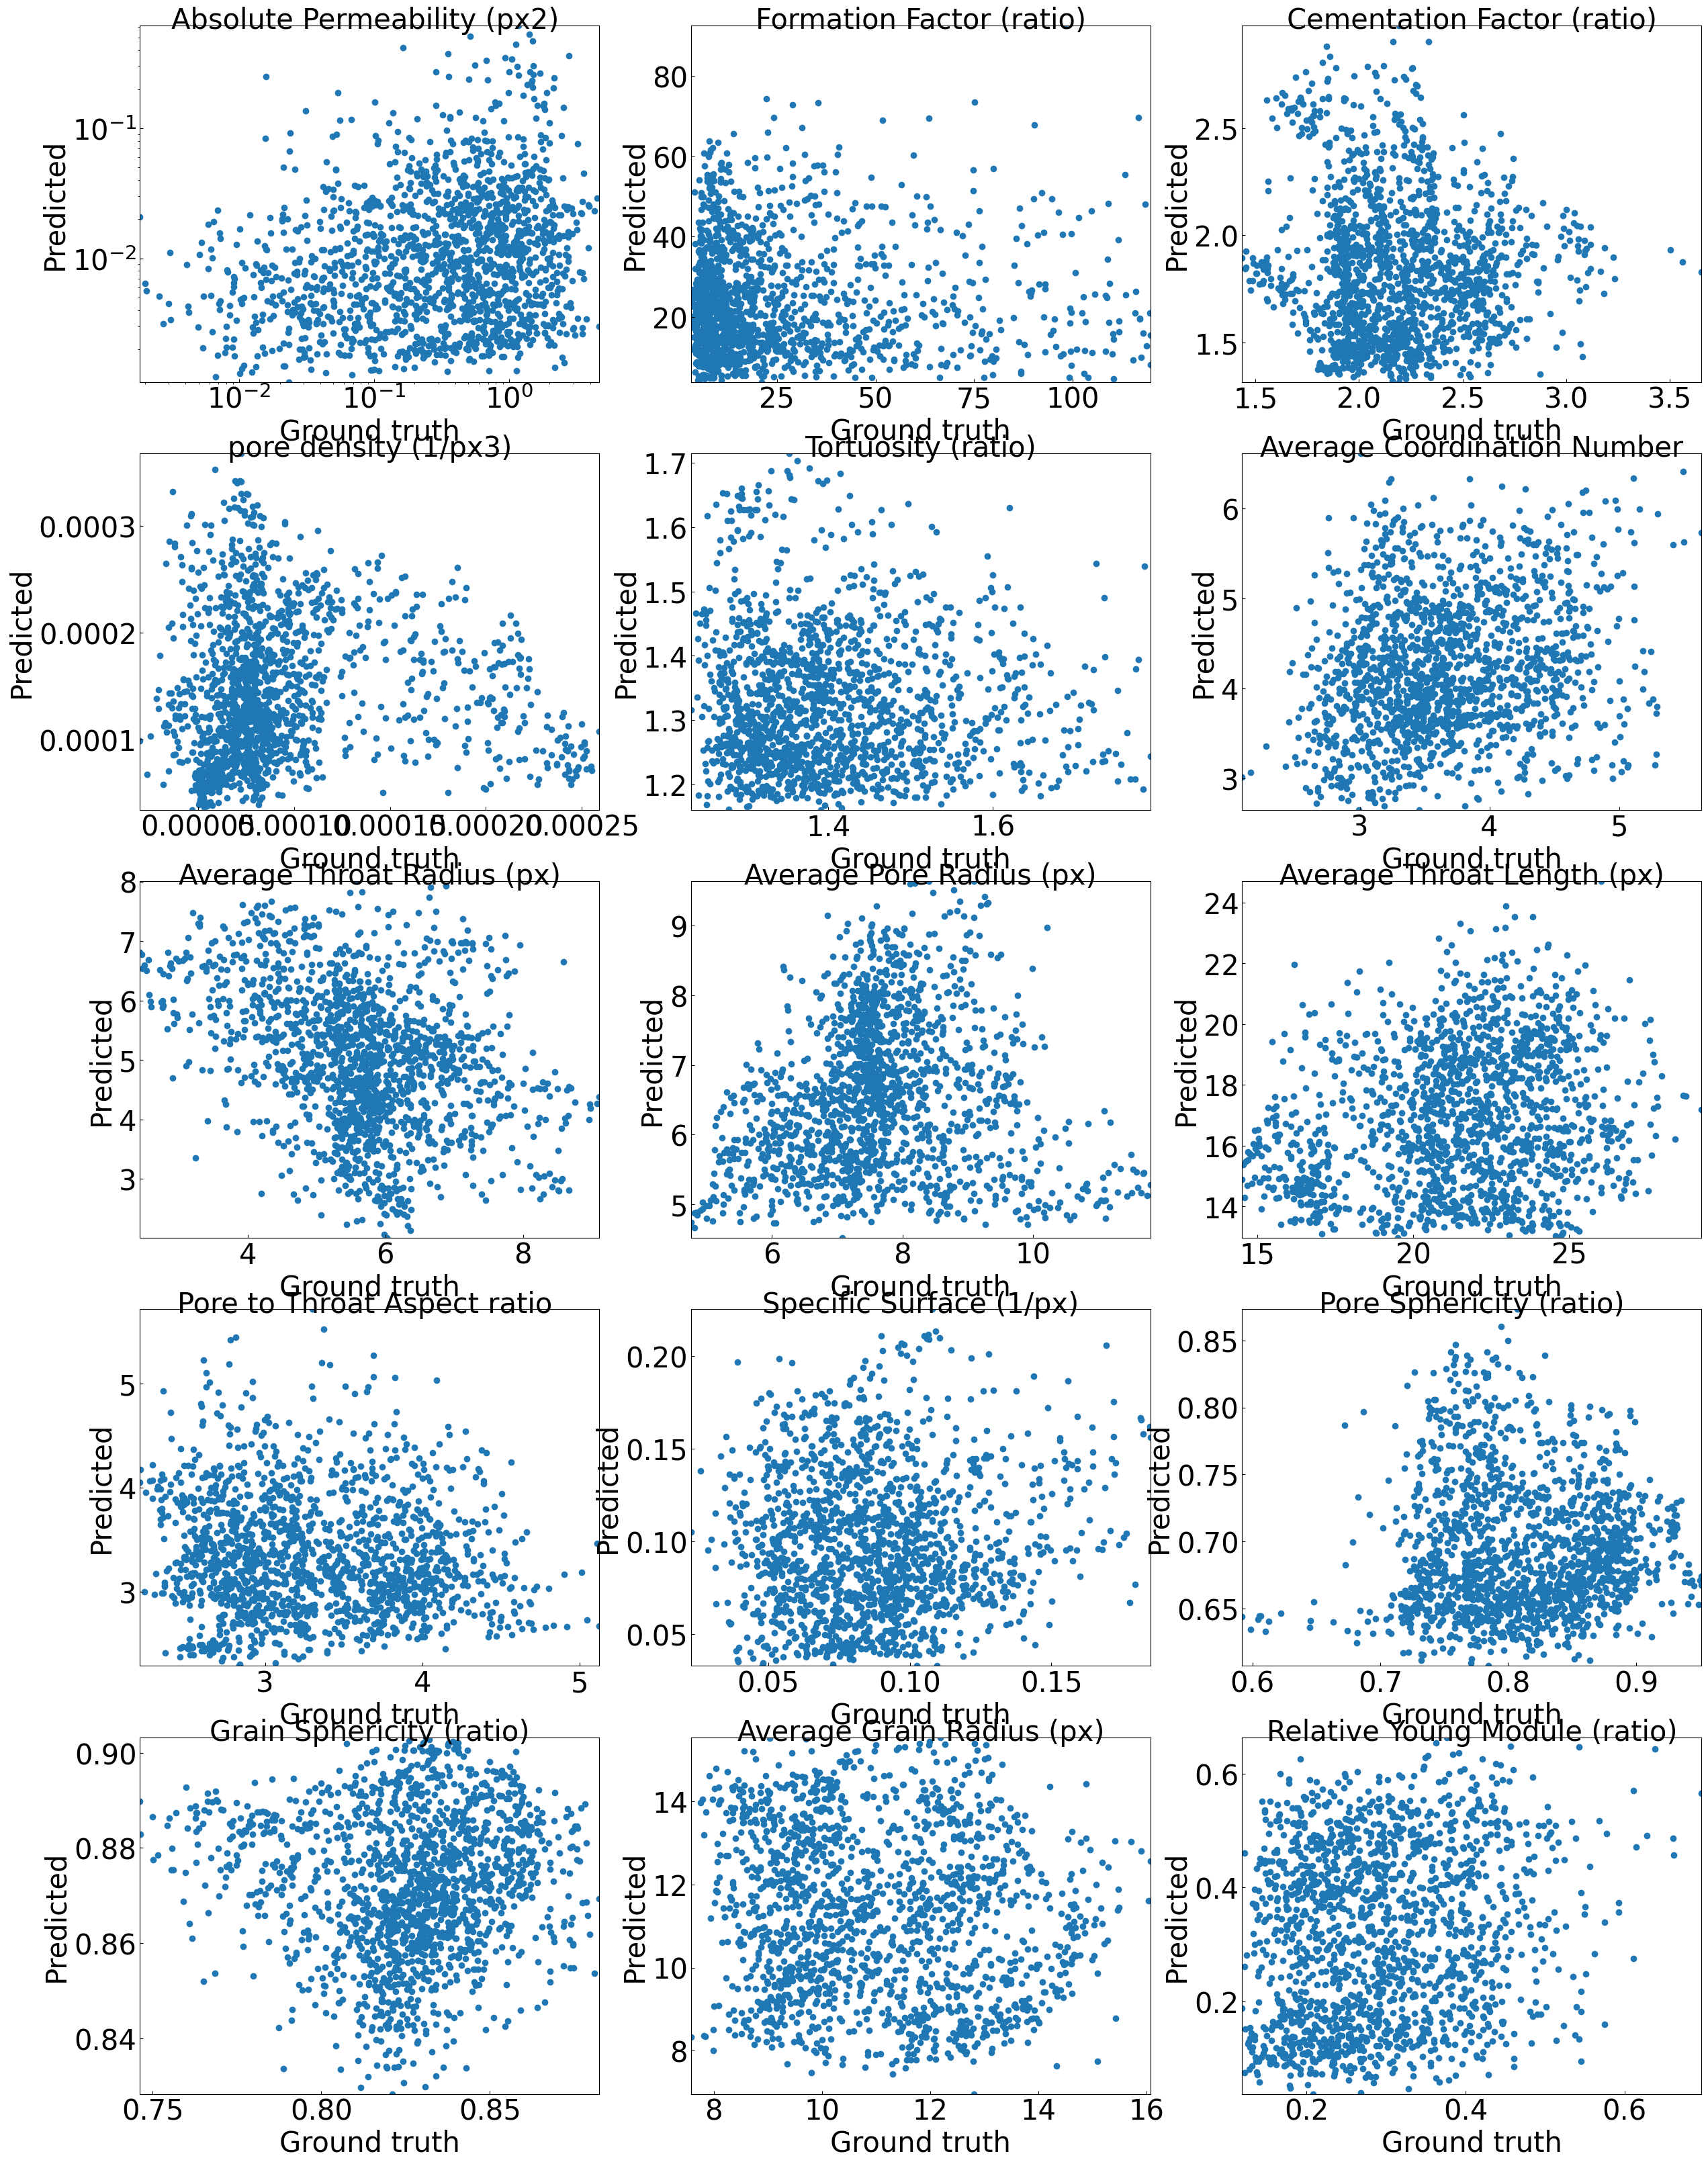

In [ ]:
# checking all functions changed work correctly for normal number of properties and slices
List=dpr.prep(dataset_1, 1)
TrainList, EvalList, TestList = dpr.splitdata(List)

model=dpr.trainmodel(dataset_1,TrainList,EvalList,retrain=1,epochs=2,batch_size=100,ModelType=3)
dpr.testmodel(model,dataset_1,TestList)

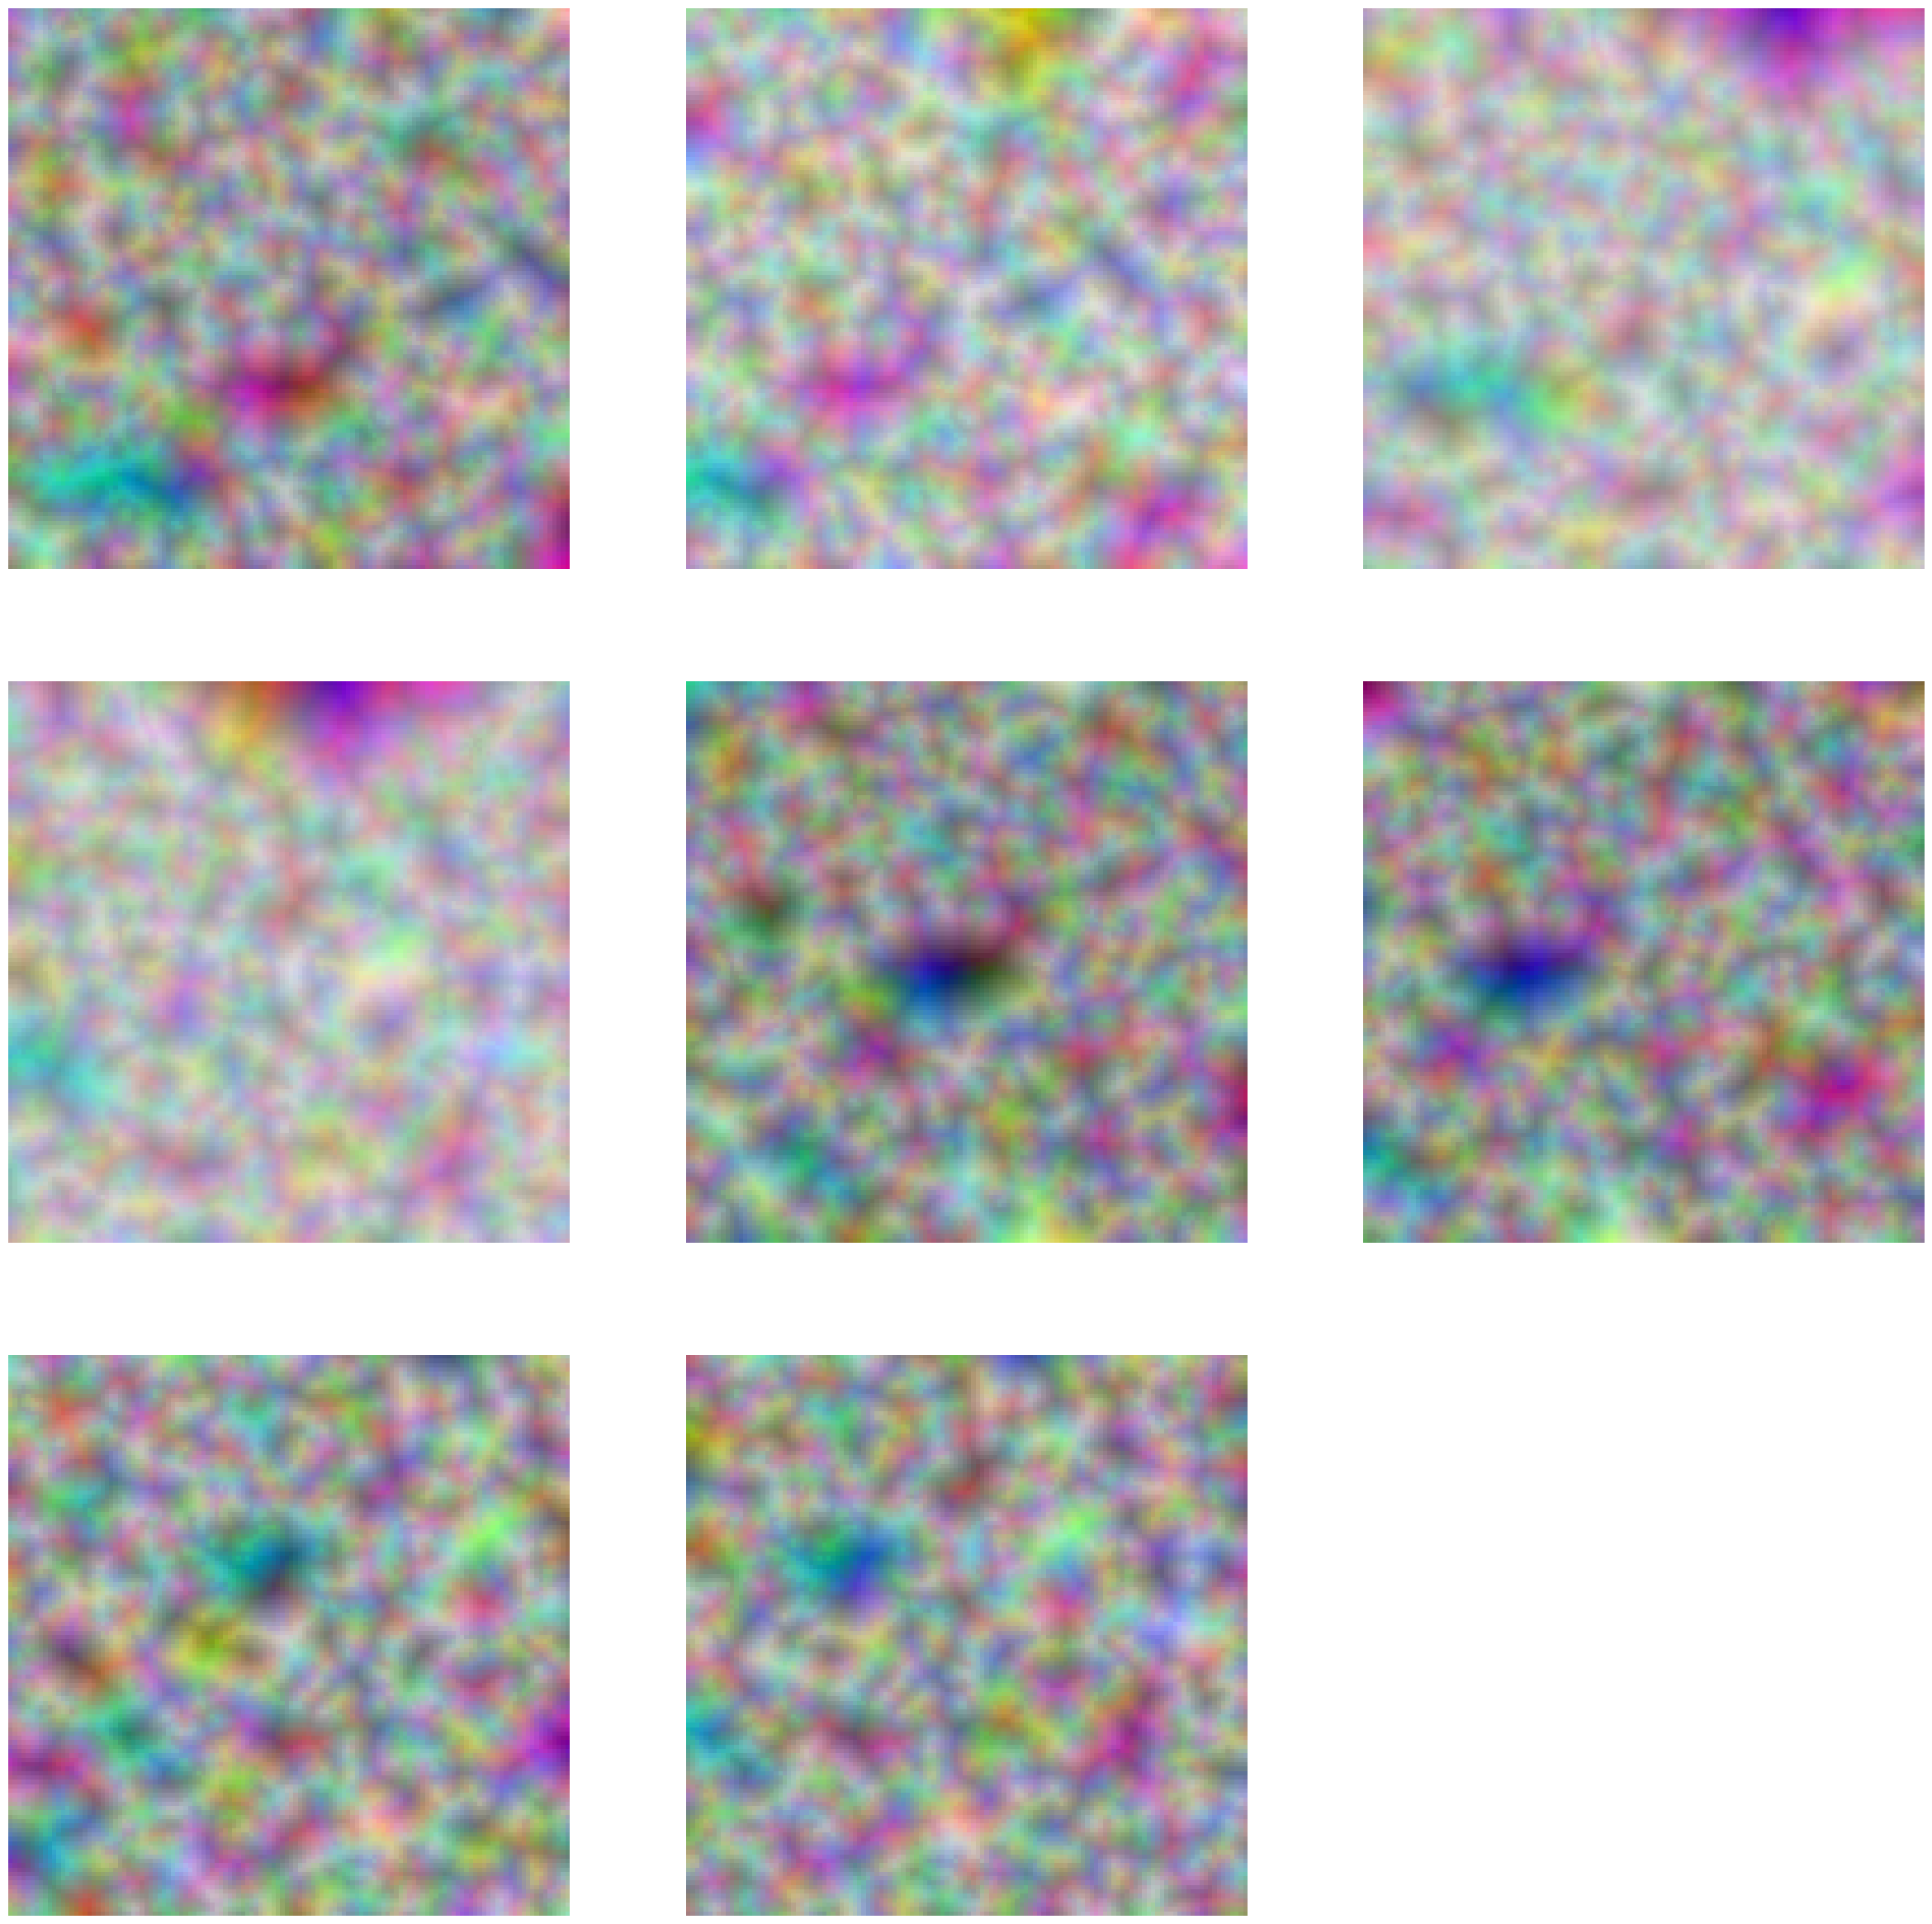

1/1 [==============================] - 0s 69ms/step


DeePore output results including 15 single-value

paramters, 4 functions and 11 distributions

__________________________________________________

        ### Single-value parameters ###

__________________________________________________



Properties                              Value

--------------------------------------------------

Absolute Permeability (um2)             1.8269018

Formation Factor (ratio)                23.2420018

Cementation Factor (ratio)              2.2331957

pore density (1/um3)                    8e-07

Tortuosity (ratio)                      1.4060743

Average Coordination Number             3.8807318

Average Throat Radius (um)              17.1633354

Average Pore Radius (um)                35.4184696

Average Throat Length (um)              95.7994072

Pore to Throat Aspect ratio             3.9273681

Specific Surface (1/um)                 0.01765

Pore Sphericity (ratio)                 0.7425

In [ ]:
model = dpr.loadmodel(ModelType=3, n=1)

A=dpr.feedsampledata(FileName="/content/drive/MyDrive/hb-final-project/Data/Sample_large.mat")

dpr.show_feature_maps(A,1)

all_preds=dpr.predict(model, A, n=1, res=4.8)
dpr.prettyresult(all_preds,'just_all_results.txt')



# Grouping with single values

Checking the data for outliers. Please wait...
checking sample: 0
checking sample: 100
checking sample: 200
checking sample: 300
checking sample: 400
checking sample: 500
checking sample: 600
checking sample: 700
checking sample: 800
checking sample: 900
checking sample: 1000
checking sample: 1100
checking sample: 1200
checking sample: 1300
checking sample: 1400
checking sample: 1500
checking sample: 1600
checking sample: 1700
checking sample: 1800
checking sample: 1900
checking sample: 2000
checking sample: 2100
checking sample: 2200
checking sample: 2300
checking sample: 2400
checking sample: 2500
checking sample: 2600
checking sample: 2700
checking sample: 2800
checking sample: 2900
checking sample: 3000
checking sample: 3100
checking sample: 3200
checking sample: 3300
checking sample: 3400
checking sample: 3500
checking sample: 3600
checking sample: 3700
checking sample: 3800
checking sample: 3900
checking sample: 4000
checking sample: 4100
checking sample: 4200
checking sample: 43

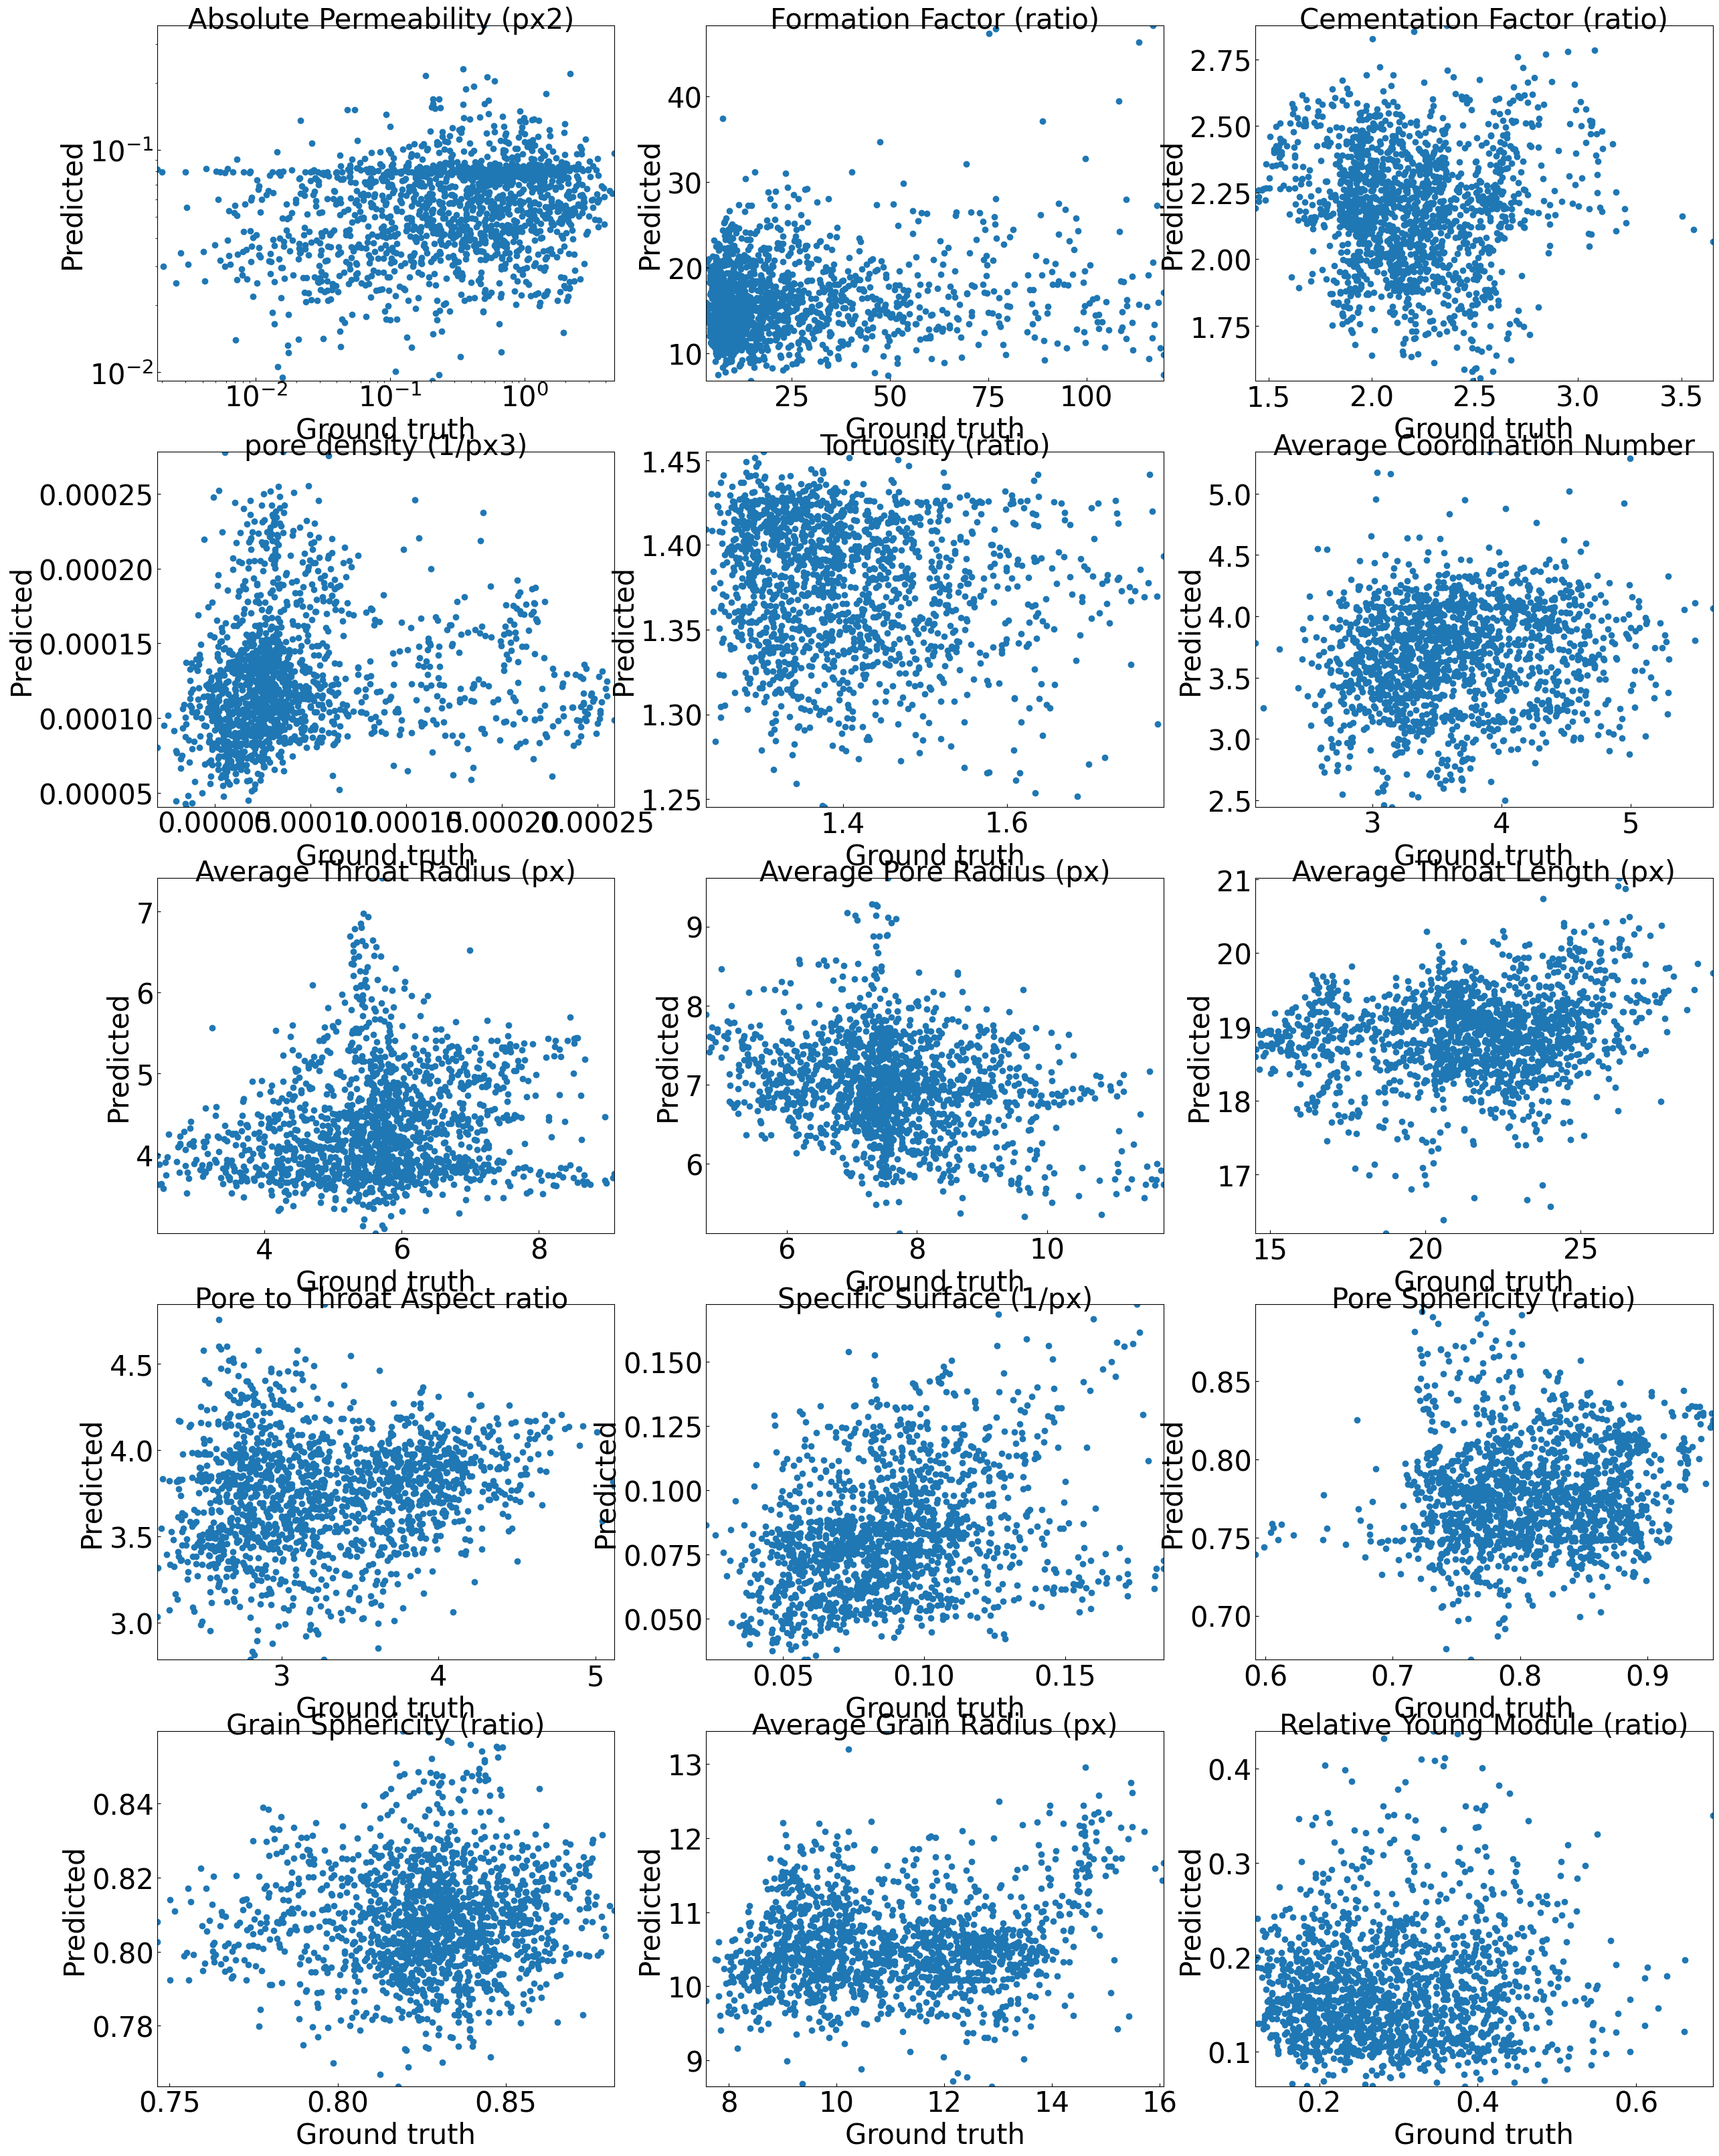

In [ ]:
# checking all functions changed work correctly for just single values
single_props = list(range(15))
List=dpr.prep(dataset_1, 1, properties=single_props)
TrainList, EvalList, TestList = dpr.splitdata(List)

model=dpr.trainmodel(dataset_1,TrainList,EvalList,retrain=1,epochs=2,batch_size=100,ModelType=3, properties=single_props)
dpr.testmodel(model,dataset_1,TestList, properties=single_props)

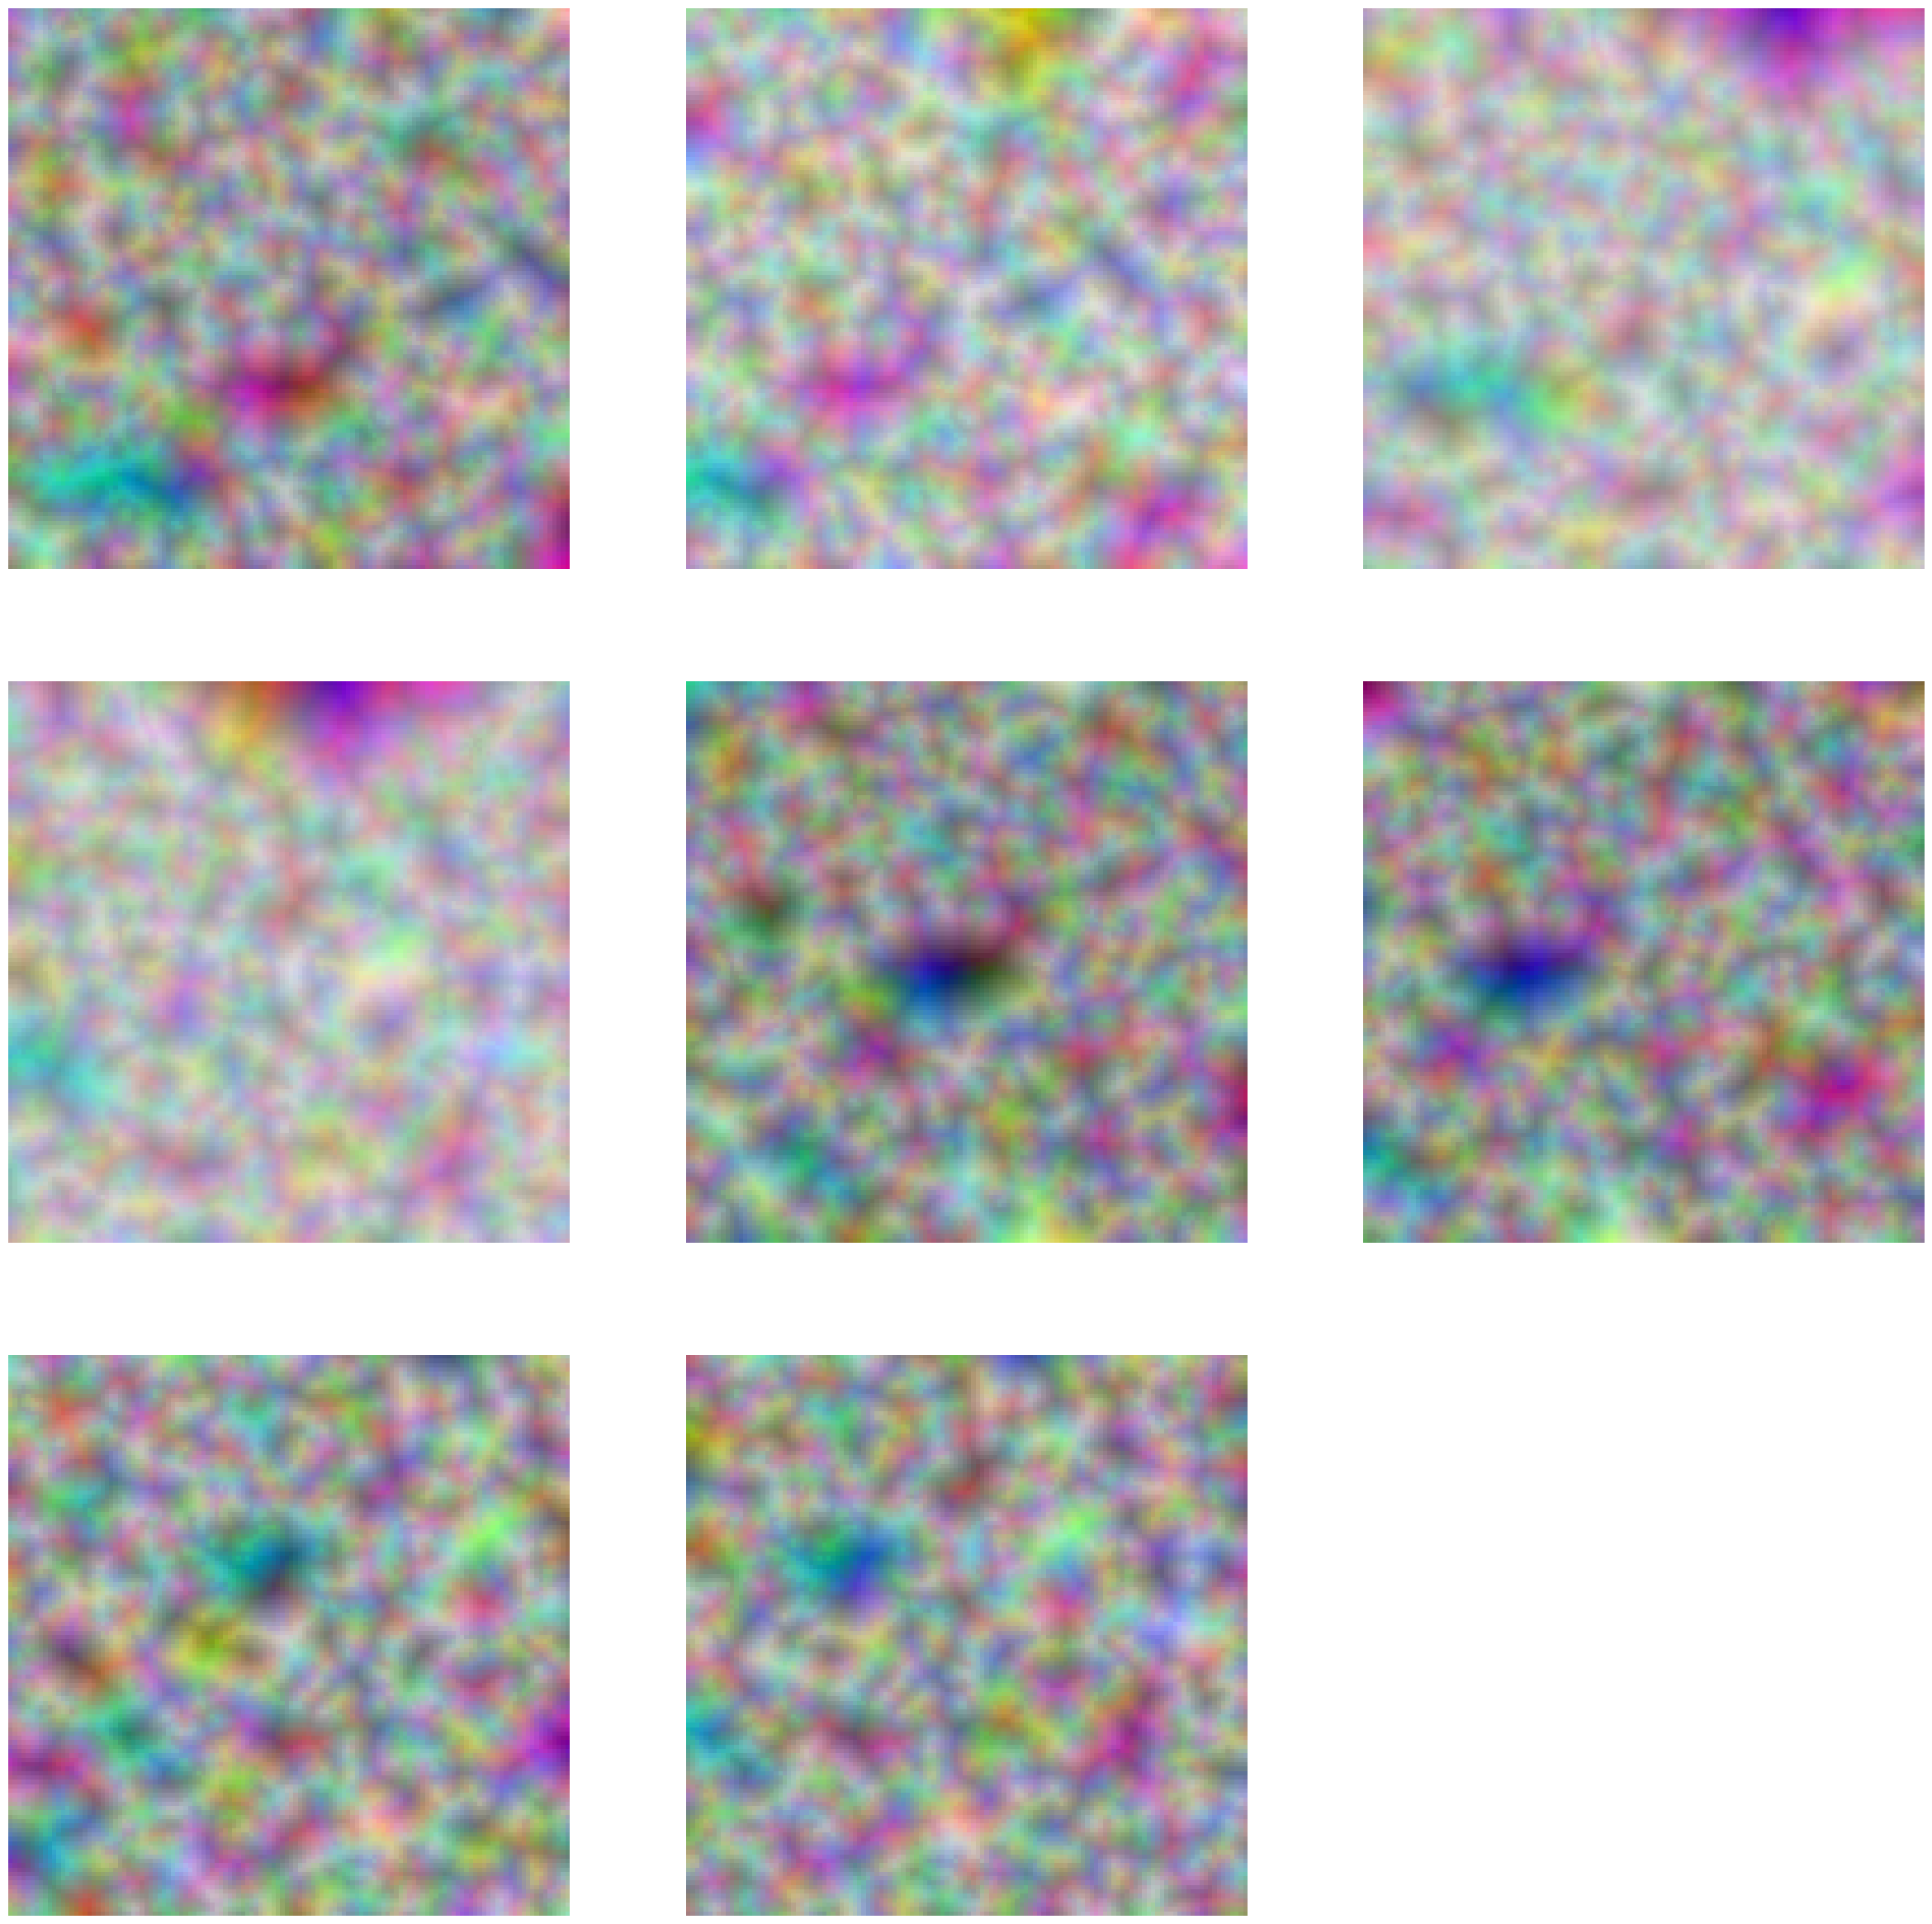

1/1 [==============================] - 0s 69ms/step


DeePore output results including 15 single-value

paramters, 4 functions and 11 distributions

__________________________________________________

        ### Single-value parameters ###

__________________________________________________



Properties                              Value

--------------------------------------------------

Absolute Permeability (um2)             1.4849155

Formation Factor (ratio)                29.1617002

Cementation Factor (ratio)              2.7262139

pore density (1/um3)                    1.4e-06

Tortuosity (ratio)                      1.4838225

Average Coordination Number             3.3672887

Average Throat Radius (um)              18.6163024

Average Pore Radius (um)                32.1745076

Average Throat Length (um)              84.1667306

Pore to Throat Aspect ratio             5.0479212

Specific Surface (1/um)                 0.0260337

Pore Sphericity (ratio)                 0.

In [ ]:
num_properties=15
properties = list(range(15))
model = dpr.loadmodel(ModelType=3, properties=15,n=1)

A=dpr.feedsampledata(FileName="/content/drive/MyDrive/hb-final-project/Data/Sample_large.mat")

dpr.show_feature_maps(A,1)

all_preds=dpr.predict(model, A, n=1, res=4.8, properties=properties)
dpr.prettyresult(all_preds,'just_singles_results.txt',properties=properties)


# Grouping with distributions

In [ ]:
# checking all functions changed work correctly for just range values
dist_props = list(range(15,30))
print(dist_props)
List=dpr.prep(dataset_1, 1, properties=dist_props)
TrainList, EvalList, TestList = dpr.splitdata(List)

model=dpr.trainmodel(dataset_1,TrainList,EvalList,retrain=1,epochs=2,batch_size=100,ModelType=3, properties=dist_props)
dpr.testmodel(model,dataset_1,TestList, properties=dist_props)

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Checking the data for outliers. Please wait...
checking sample: 0
checking sample: 100
checking sample: 200
checking sample: 300
checking sample: 400
checking sample: 500
checking sample: 600
checking sample: 700
checking sample: 800
checking sample: 900
checking sample: 1000
checking sample: 1100
checking sample: 1200
checking sample: 1300
checking sample: 1400
checking sample: 1500
checking sample: 1600
checking sample: 1700
checking sample: 1800
checking sample: 1900
checking sample: 2000
checking sample: 2100
checking sample: 2200
checking sample: 2300
checking sample: 2400
checking sample: 2500
checking sample: 2600
checking sample: 2700
checking sample: 2800
checking sample: 2900
checking sample: 3000
checking sample: 3100
checking sample: 3200
checking sample: 3300
checking sample: 3400
checking sample: 3500
checking sample: 3600
checking sample: 3700
checking sample: 3800
checking sample: 3900
checking sample: 4000
ch

<Figure size 3000x4000 with 0 Axes>

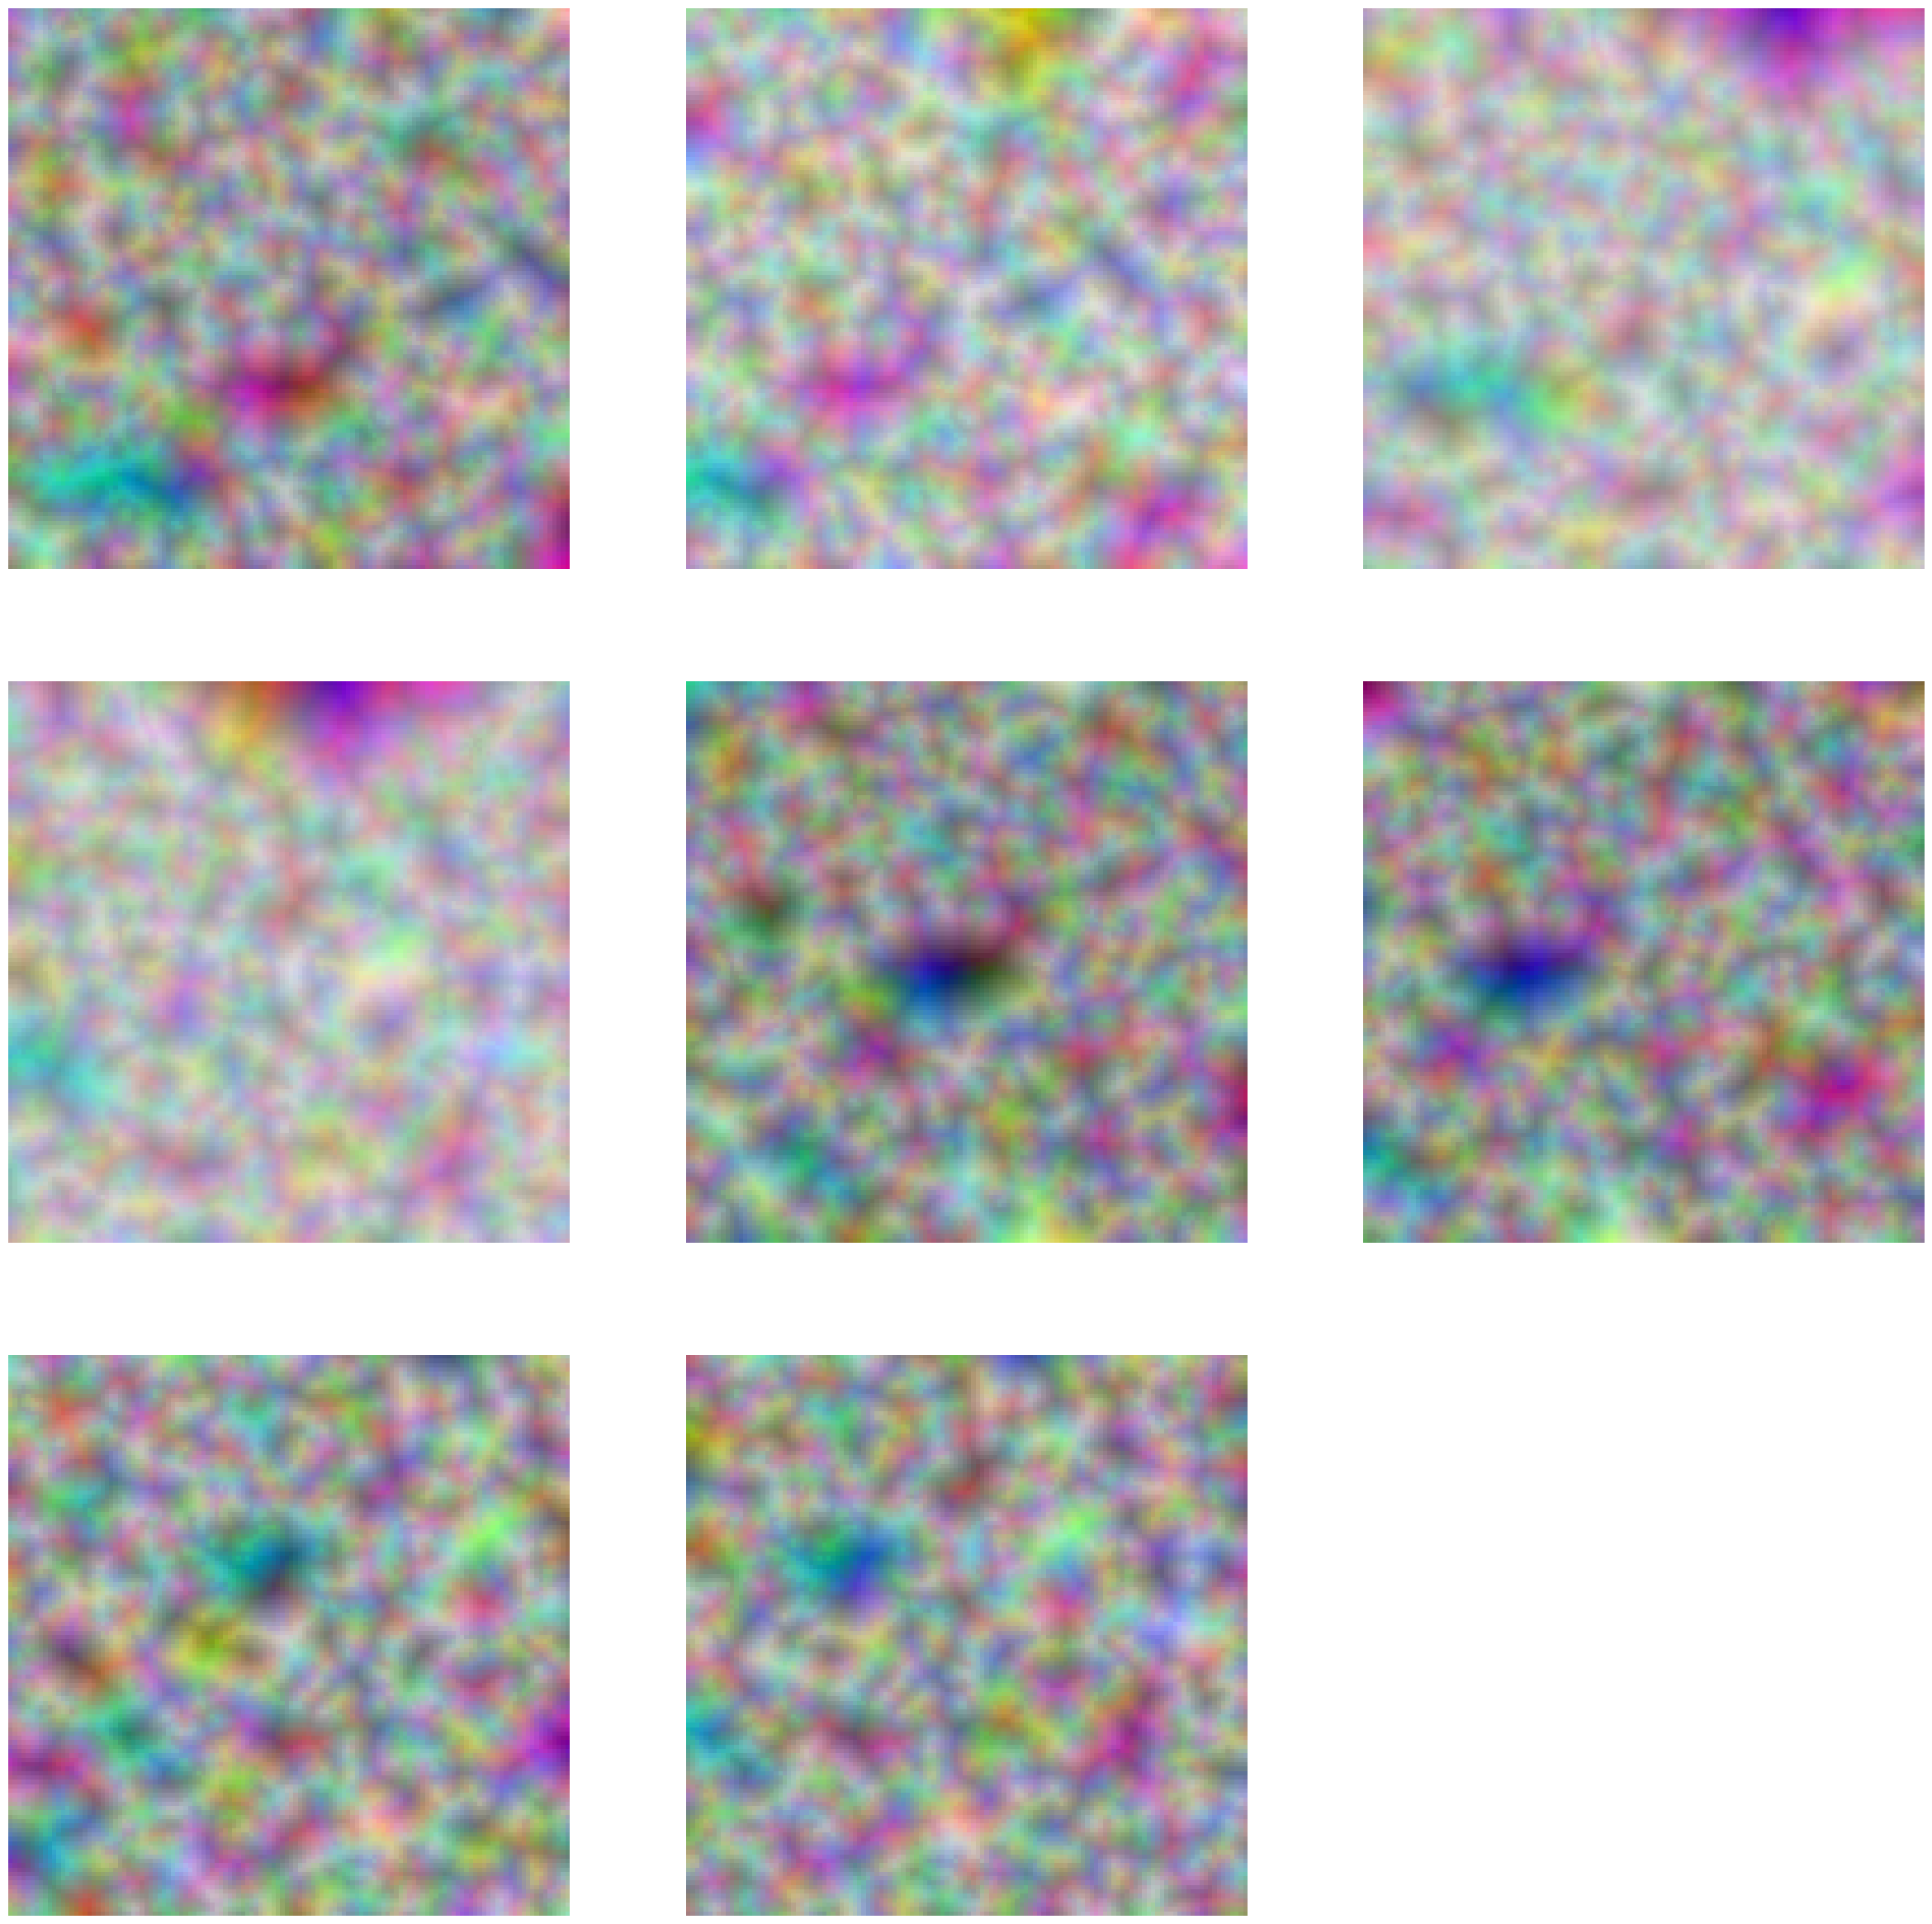

1/1 [==============================] - 0s 102ms/step


DeePore output results including 15 single-value

paramters, 4 functions and 11 distributions

__________________________________________________

        ### Single-value parameters ###

__________________________________________________



Properties                              Value

--------------------------------------------------



__________________________________________________

       ### Functions and distributions ###

__________________________________________________





# Leveret J Function (ratio)

--------------------------------------------------

Wetting-sat (Sw)                        Value

--------------------------------------------------

0.01                                    2.5815013

0.02                                    2.1460098

0.03                                    2.1279018

0.04                                    2.5742626

0.05                                    2.7896109

0.06          

In [ ]:
num_properties=15*100
properties = list(range(15,30))
model = dpr.loadmodel(ModelType=3, properties=1500,n=1)

A=dpr.feedsampledata(FileName="/content/drive/MyDrive/hb-final-project/Data/Sample_large.mat")

dpr.show_feature_maps(A,1)

all_preds=dpr.predict(model, A, n=1, res=4.8, properties=properties)
dpr.prettyresult(all_preds,'just_range_results.txt',properties=properties)

# Correlated properties 1

Checking the data for outliers. Please wait...
checking sample: 0
checking sample: 100
checking sample: 200
checking sample: 300
checking sample: 400
checking sample: 500
checking sample: 600
checking sample: 700
checking sample: 800
checking sample: 900
checking sample: 1000
checking sample: 1100
checking sample: 1200
checking sample: 1300
checking sample: 1400
checking sample: 1500
checking sample: 1600
checking sample: 1700
checking sample: 1800
checking sample: 1900
checking sample: 2000
checking sample: 2100
checking sample: 2200
checking sample: 2300
checking sample: 2400
checking sample: 2500
checking sample: 2600
checking sample: 2700
checking sample: 2800
checking sample: 2900
checking sample: 3000
checking sample: 3100
checking sample: 3200
checking sample: 3300
checking sample: 3400
checking sample: 3500
checking sample: 3600
checking sample: 3700
checking sample: 3800
checking sample: 3900
checking sample: 4000
checking sample: 4100
checking sample: 4200
checking sample: 43

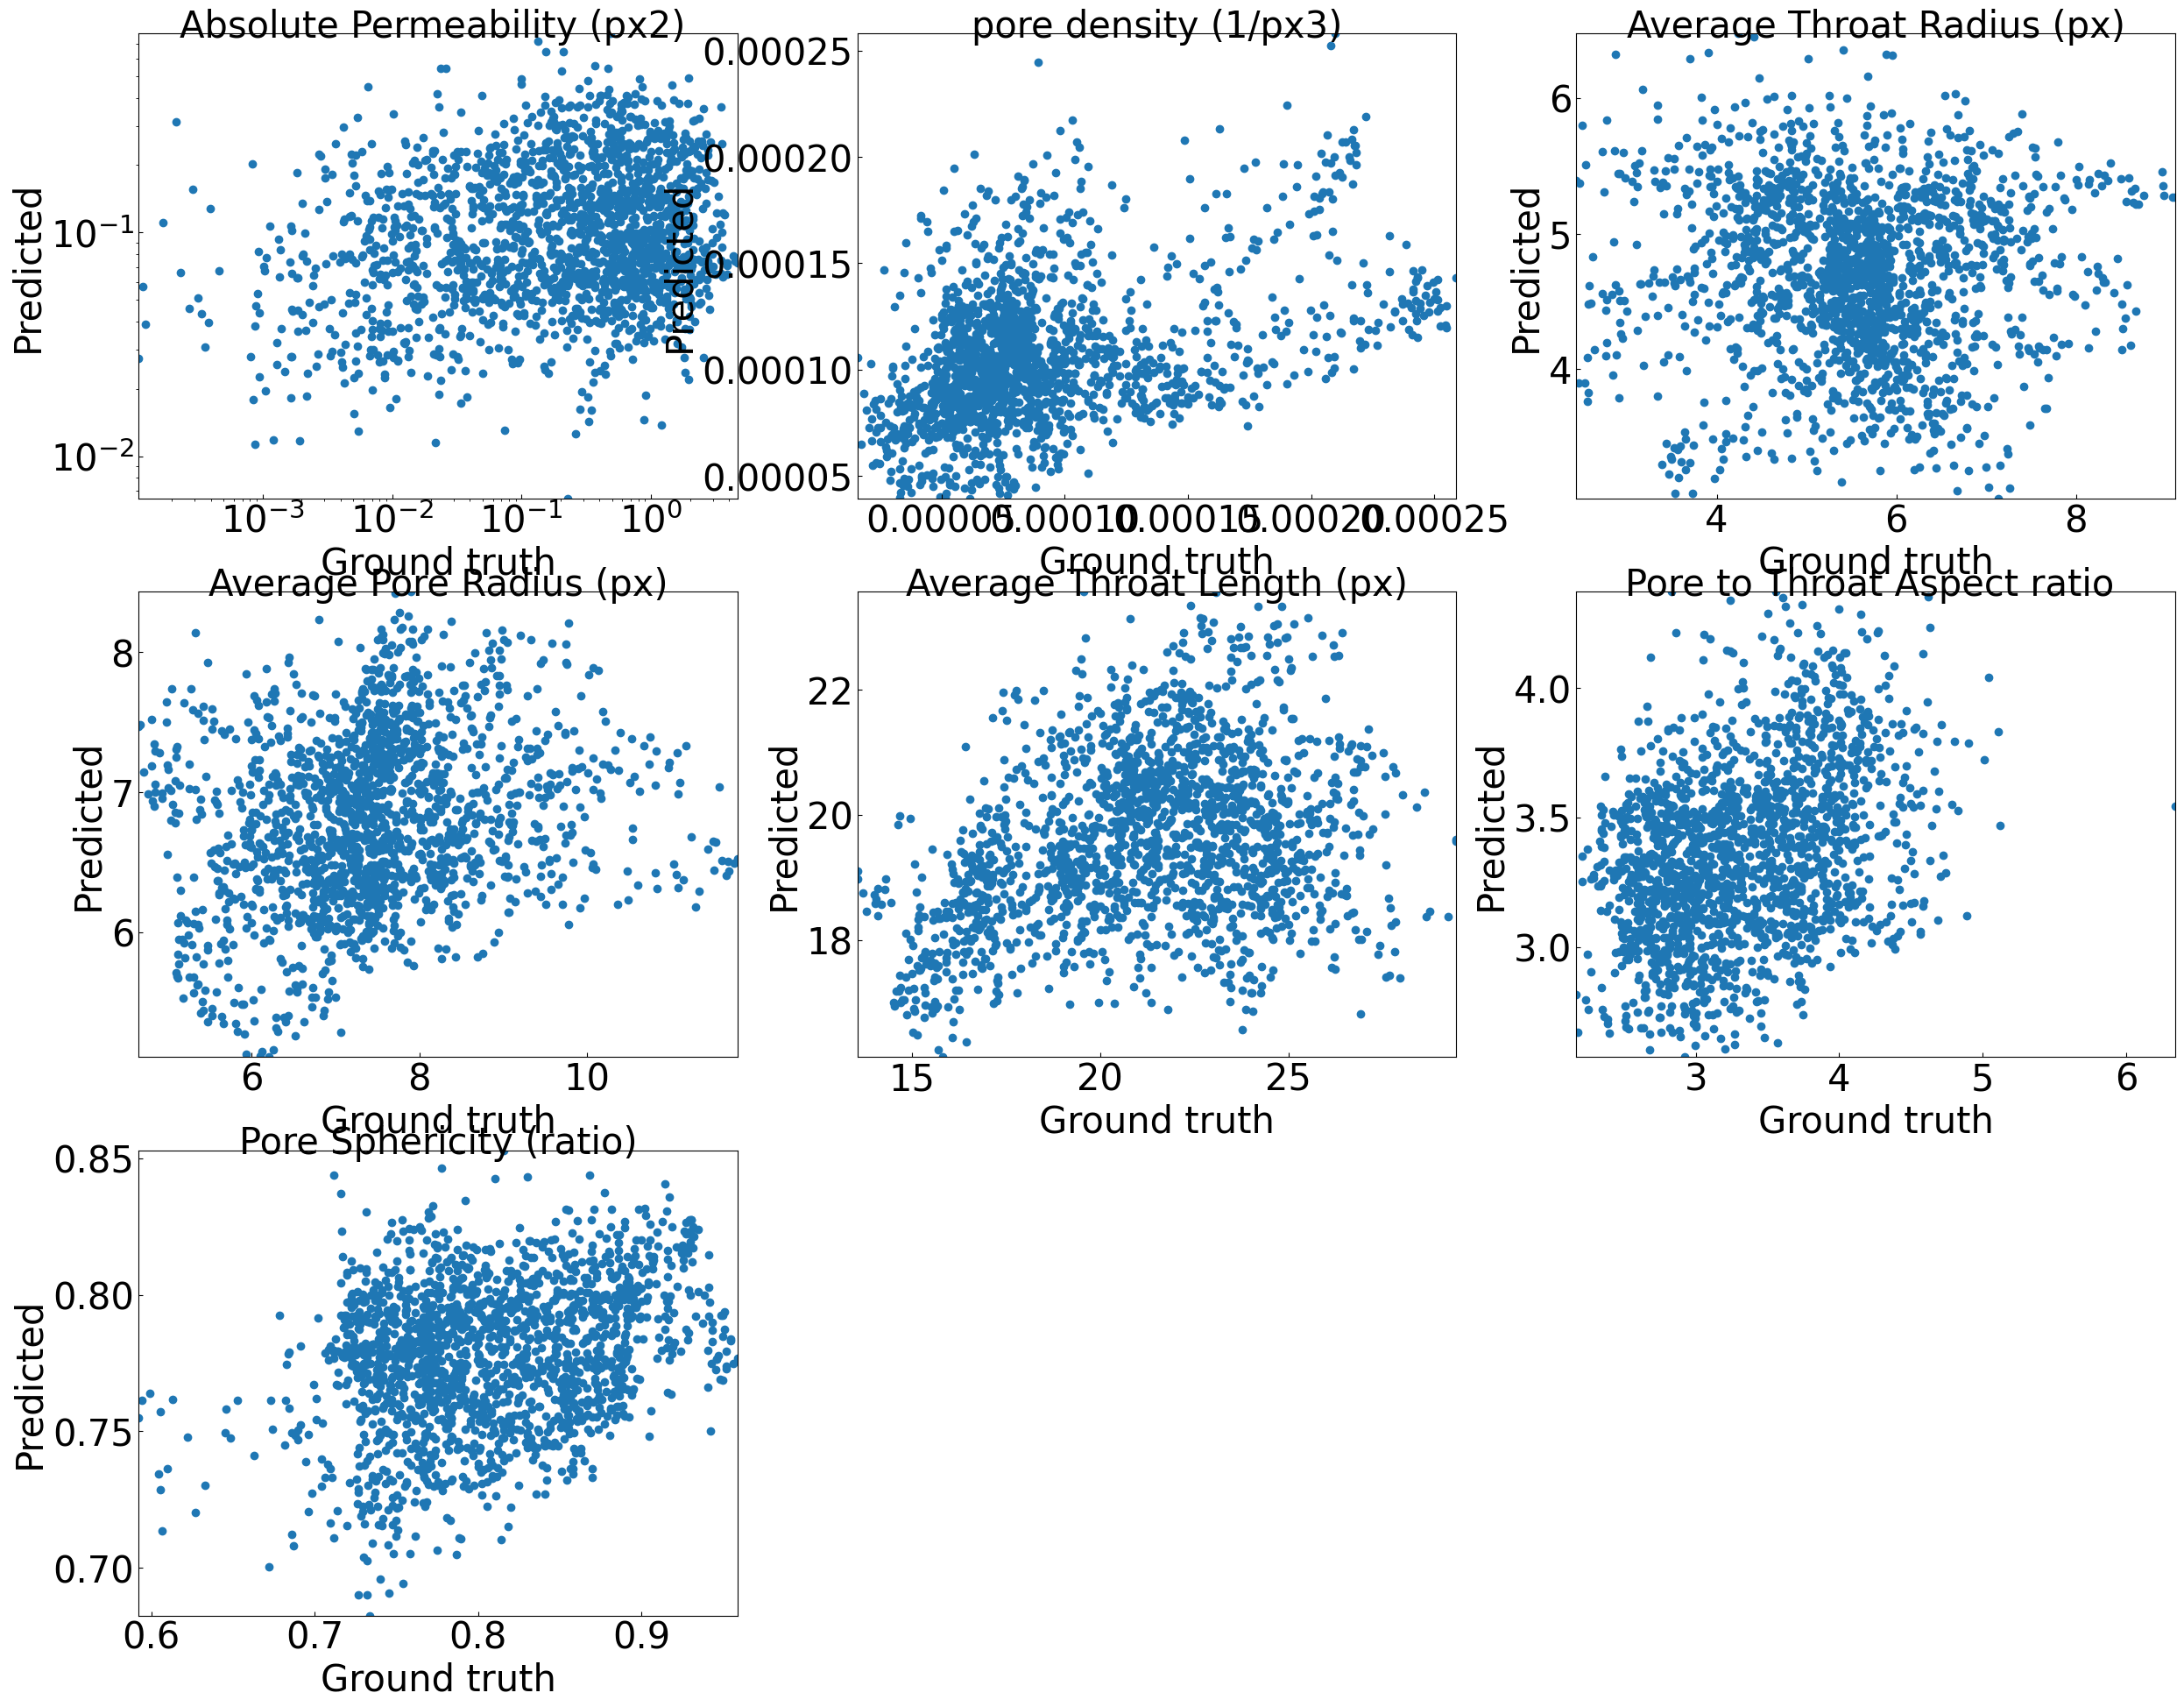

In [ ]:
# testing correlated group 1 - 3 slices

group_1 = [1,4,7,8,9,10,12,16,17,18,20,21,22,23,24,25,26]
# iterate through subtracting 1 from each
group_1 = [x-1 for x in group_1]

List=dpr.prep(dataset_1, 1, properties=group_1)
TrainList, EvalList, TestList = dpr.splitdata(List)

model=dpr.trainmodel(dataset_1,TrainList,EvalList,retrain=1,epochs=50,batch_size=100,ModelType=3, n=1, properties=group_1)
dpr.testmodel(model,dataset_1,TestList, n=1, properties=group_1)

num_properties = 7 + (100*10)

model = dpr.loadmodel(ModelType=3, properties=num_properties,n=1)

A=dpr.feedsampledata(FileName="/content/drive/MyDrive/hb-final-project/Data/Sample_large.mat", n=1)

#dpr.show_feature_maps(A,n=2)

all_preds=dpr.predict(model, A, n=1, res=4.8, properties=group_1)
dpr.prettyresult(all_preds,'correlated_1_results_50epoch_3slice.txt',properties=group_1)


Checking the data for outliers. Please wait...
checking sample: 0
checking sample: 100
checking sample: 200
checking sample: 300
checking sample: 400
checking sample: 500
checking sample: 600
checking sample: 700
checking sample: 800
checking sample: 900
checking sample: 1000
checking sample: 1100
checking sample: 1200
checking sample: 1300
checking sample: 1400
checking sample: 1500
checking sample: 1600
checking sample: 1700
checking sample: 1800
checking sample: 1900
checking sample: 2000
checking sample: 2100
checking sample: 2200
checking sample: 2300
checking sample: 2400
checking sample: 2500
checking sample: 2600
checking sample: 2700
checking sample: 2800
checking sample: 2900
checking sample: 3000
checking sample: 3100
checking sample: 3200
checking sample: 3300
checking sample: 3400
checking sample: 3500
checking sample: 3600
checking sample: 3700
checking sample: 3800
checking sample: 3900
checking sample: 4000
checking sample: 4100
checking sample: 4200
checking sample: 43

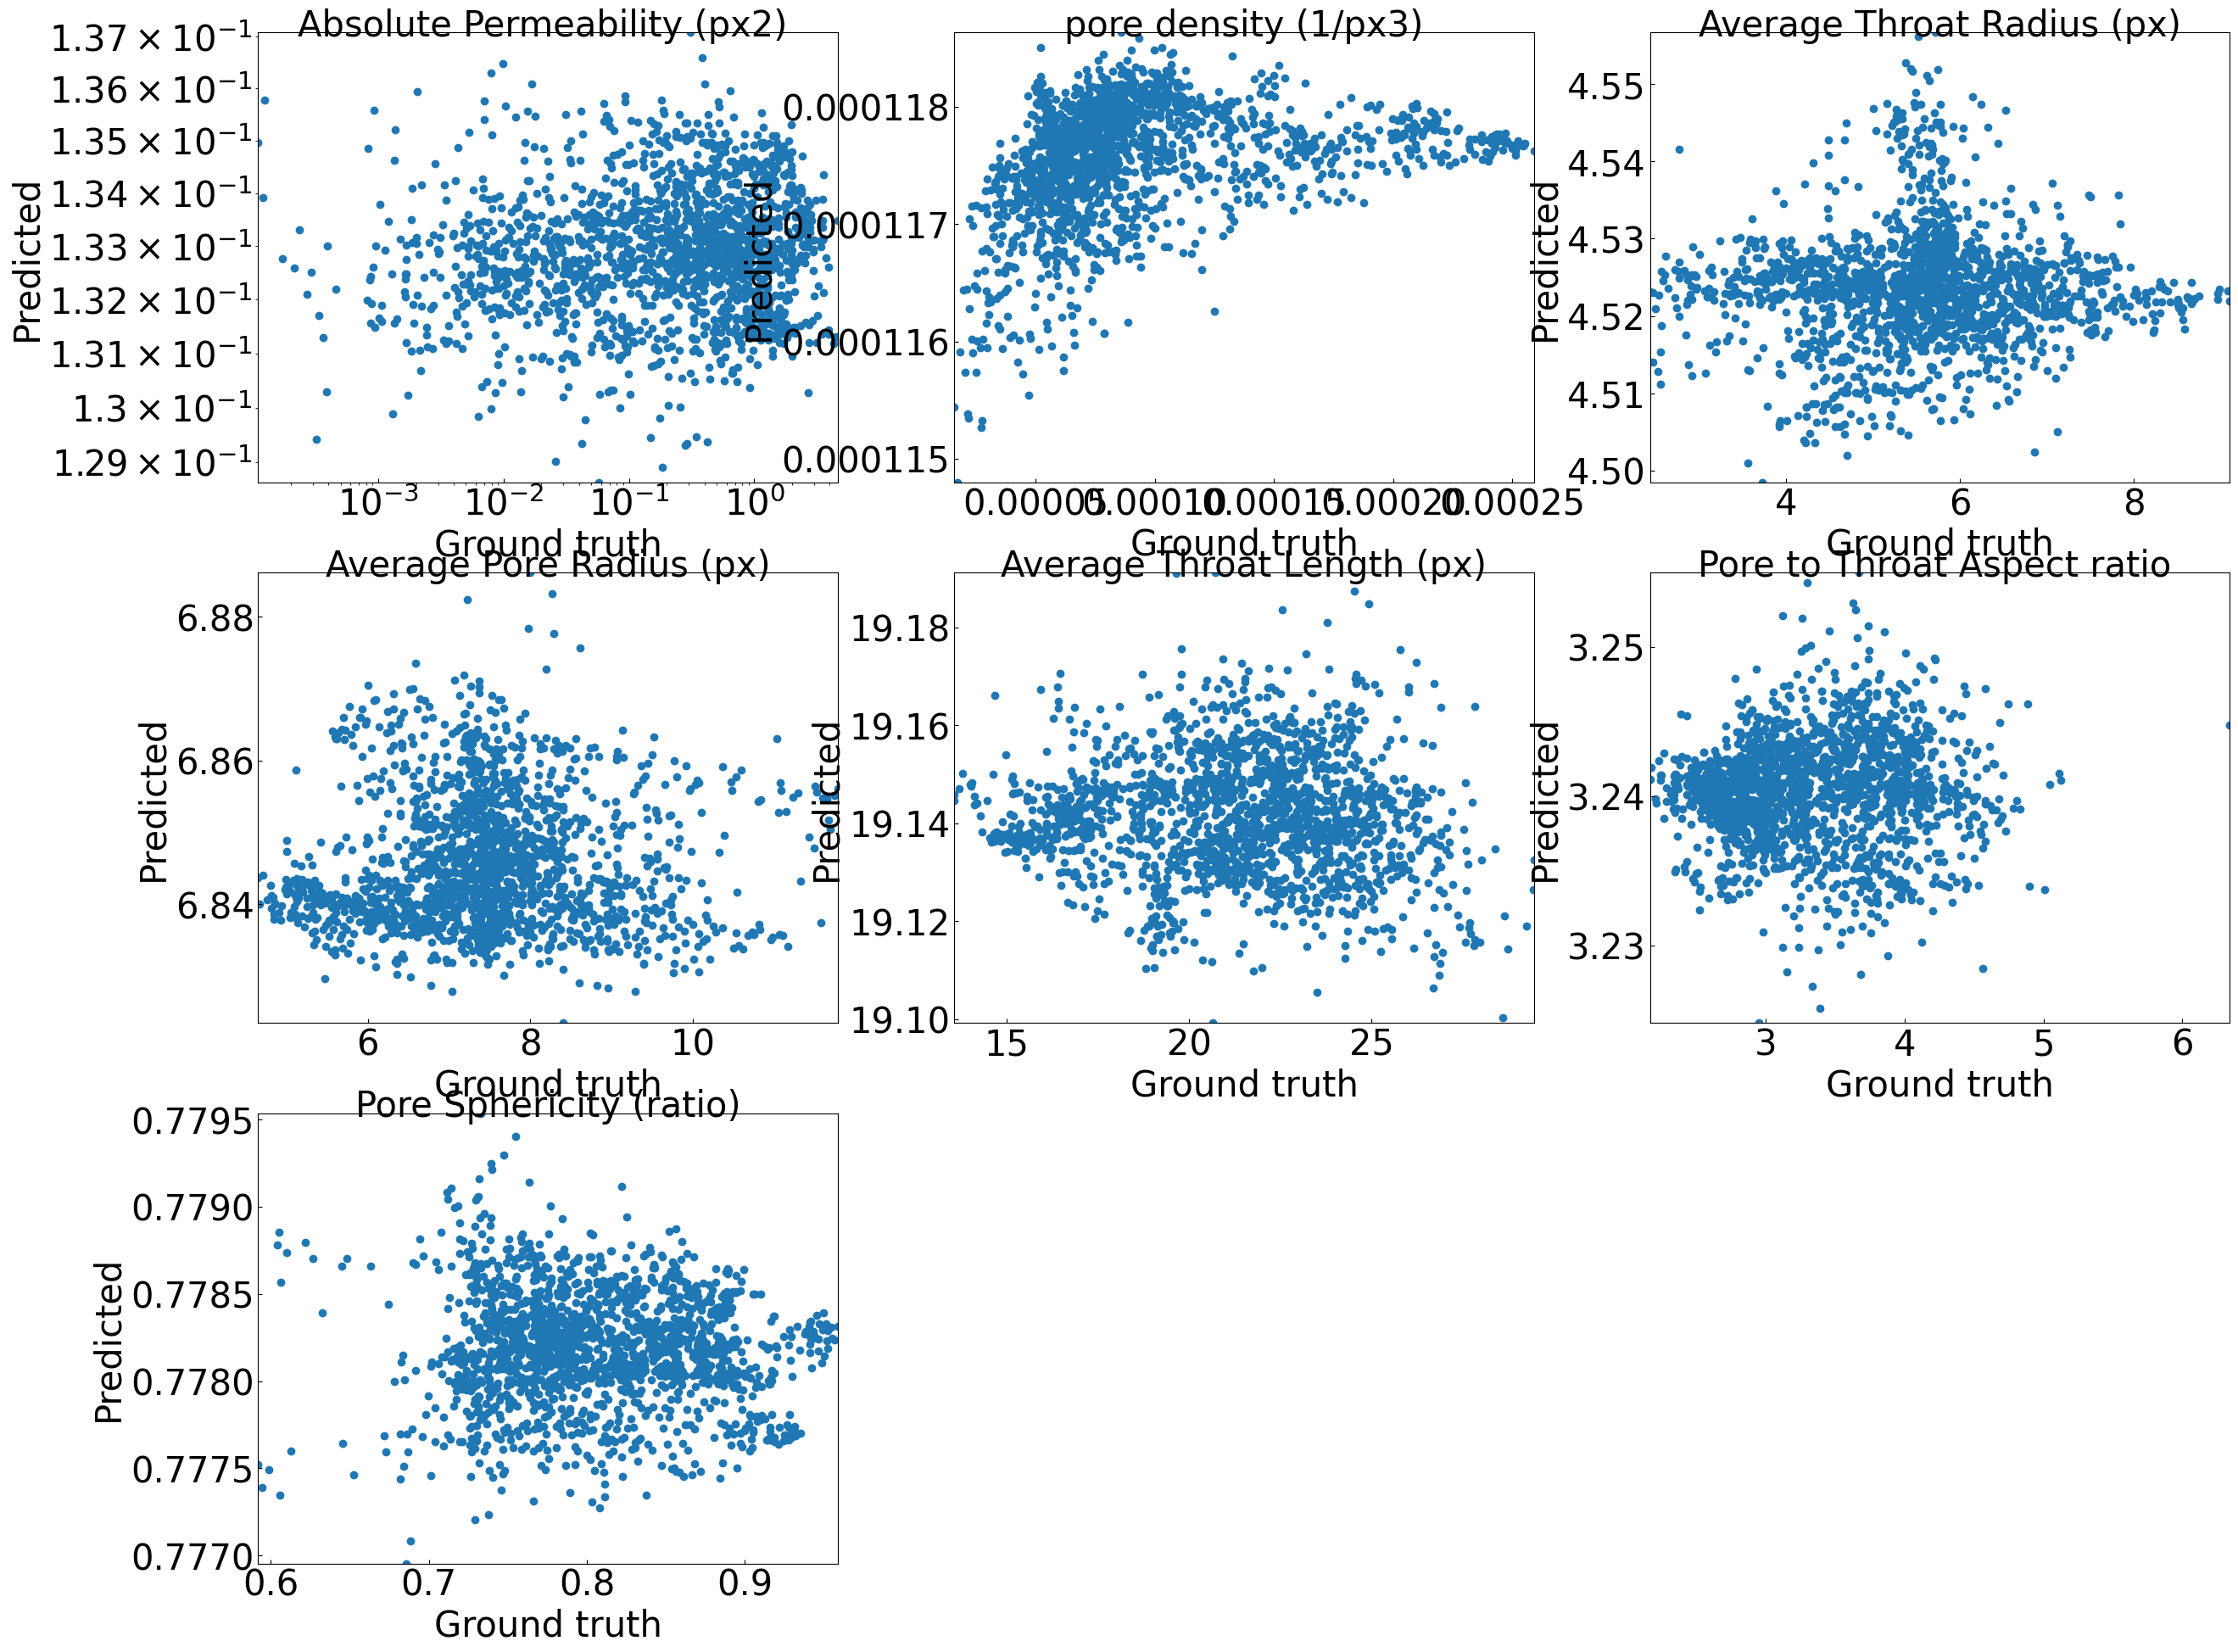

In [ ]:
# testing correlated group 1 - 6 slices

group_1 = [1,4,7,8,9,10,12,16,17,18,20,21,22,23,24,25,26]
# iterate through subtracting 1 from each
group_1 = [x-1 for x in group_1]

List=dpr.prep(dataset_2, 2, properties=group_1)
TrainList, EvalList, TestList = dpr.splitdata(List)

model=dpr.trainmodel(dataset_2,TrainList,EvalList,retrain=1,epochs=50,batch_size=100,ModelType=3, n=2, properties=group_1)
dpr.testmodel(model,dataset_2,TestList, n=2, properties=group_1)

num_properties = 7 + (100*10)

model = dpr.loadmodel(ModelType=3, properties=num_properties,n=2)

A=dpr.feedsampledata(FileName="/content/drive/MyDrive/hb-final-project/Data/Sample_large.mat", n=2)

#dpr.show_feature_maps(A,n=2)

all_preds=dpr.predict(model, A, n=2, res=4.8, properties=group_1)
dpr.prettyresult(all_preds,'correlated_1_results_50epoch_6slice.txt',properties=group_1)


# Correlated properties 2

Checking the data for outliers. Please wait...
checking sample: 0
checking sample: 100
checking sample: 200
checking sample: 300
checking sample: 400
checking sample: 500
checking sample: 600
checking sample: 700
checking sample: 800
checking sample: 900
checking sample: 1000
checking sample: 1100
checking sample: 1200
checking sample: 1300
checking sample: 1400
checking sample: 1500
checking sample: 1600
checking sample: 1700
checking sample: 1800
checking sample: 1900
checking sample: 2000
checking sample: 2100
checking sample: 2200
checking sample: 2300
checking sample: 2400
checking sample: 2500
checking sample: 2600
checking sample: 2700
checking sample: 2800
checking sample: 2900
checking sample: 3000
checking sample: 3100
checking sample: 3200
checking sample: 3300
checking sample: 3400
checking sample: 3500
checking sample: 3600
checking sample: 3700
checking sample: 3800
checking sample: 3900
checking sample: 4000
checking sample: 4100
checking sample: 4200
checking sample: 43

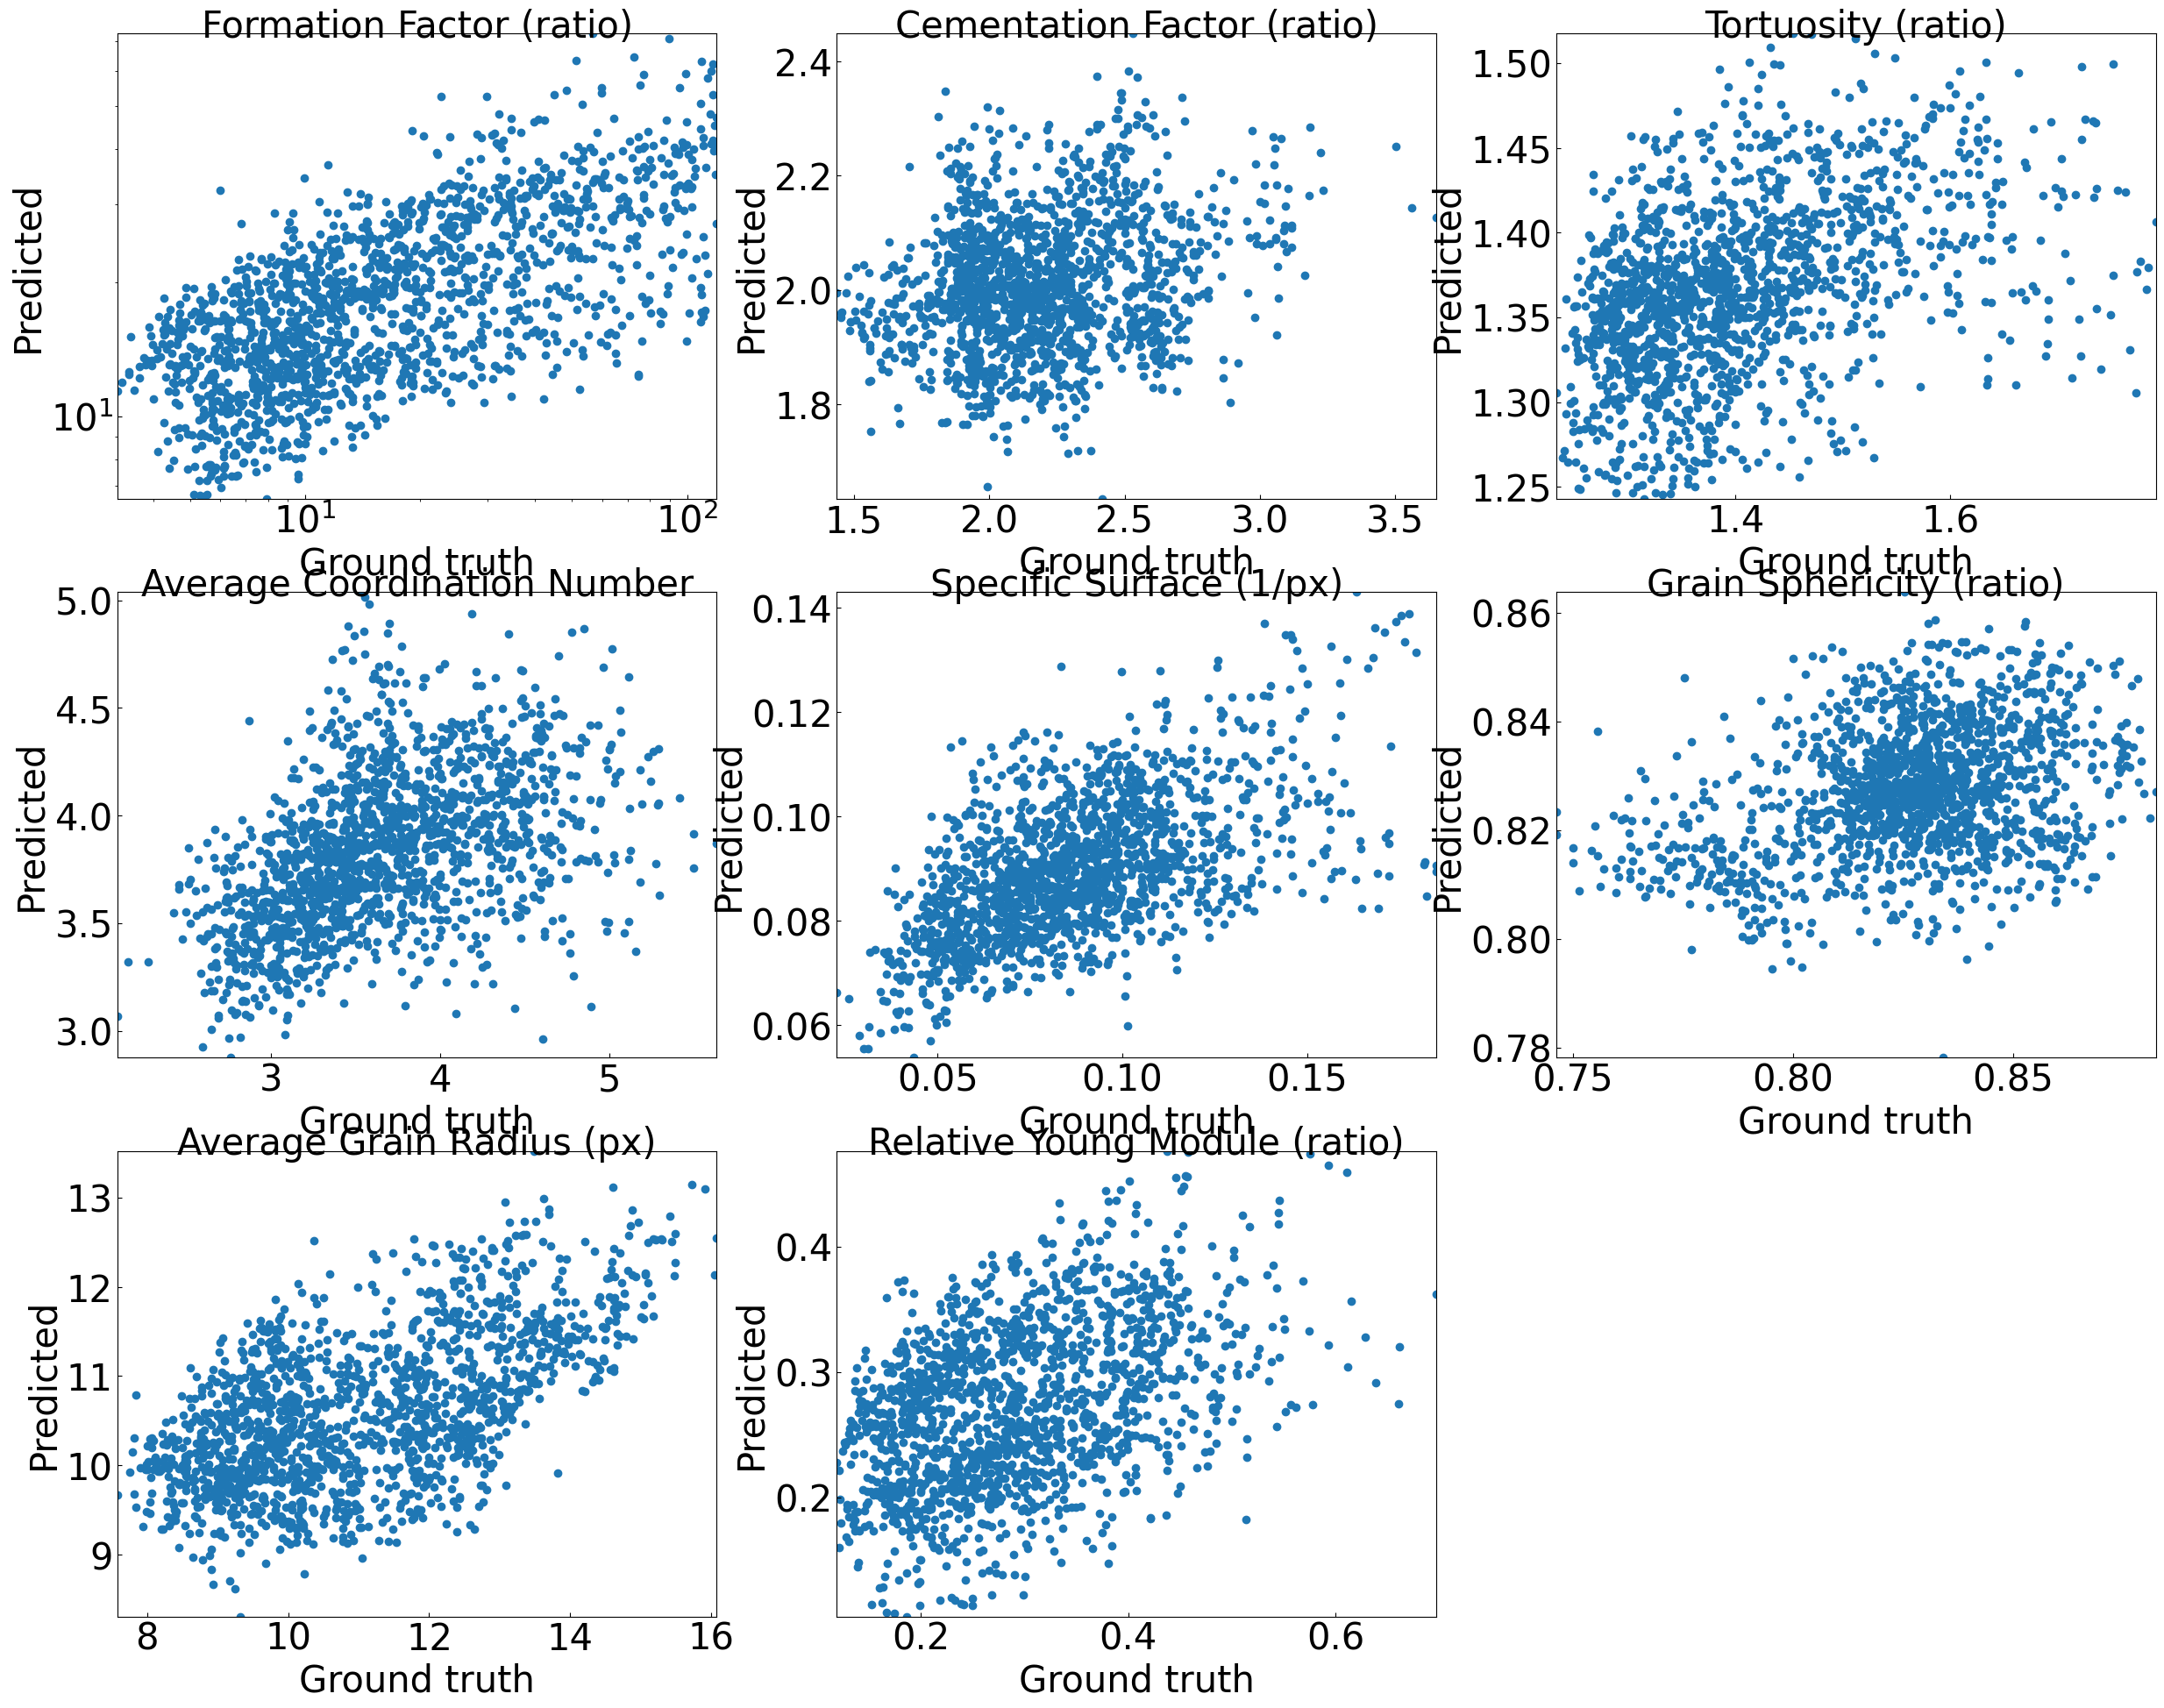

In [ ]:
# testing correlated group 2 - 3 slices
group_2 = [2,3,5,6,11,13,14,15,19,27,28,29,30]
# iterate through subtracting 1 from each
group_2 = [x-1 for x in group_2]


List=dpr.prep(dataset_1, 1, properties=group_2)
TrainList, EvalList, TestList = dpr.splitdata(List)

model=dpr.trainmodel(dataset_1,TrainList,EvalList,retrain=1,epochs=50,batch_size=100,ModelType=3, n=1, properties=group_2)
dpr.testmodel(model,dataset_1,TestList,n=1, properties=group_2)
group_2 = [2,3,5,6,11,13,14,15,19,27,28,29,30]

properties = [x-1 for x in group_2]
num_properties = 8 + (100*5)

model = dpr.loadmodel(ModelType=3, properties=num_properties,n=1)

A=dpr.feedsampledata(FileName="/content/drive/MyDrive/hb-final-project/Data/Sample_large.mat", n=1)

#dpr.show_feature_maps(A,n=2)

all_preds=dpr.predict(model, A, n=1, res=4.8, properties=properties)
dpr.prettyresult(all_preds,'correlated_2_results_50epoch_3slice.txt',properties=properties)



Checking the data for outliers. Please wait...
checking sample: 0
checking sample: 100
checking sample: 200
checking sample: 300
checking sample: 400
checking sample: 500
checking sample: 600
checking sample: 700
checking sample: 800
checking sample: 900
checking sample: 1000
checking sample: 1100
checking sample: 1200
checking sample: 1300
checking sample: 1400
checking sample: 1500
checking sample: 1600
checking sample: 1700
checking sample: 1800
checking sample: 1900
checking sample: 2000
checking sample: 2100
checking sample: 2200
checking sample: 2300
checking sample: 2400
checking sample: 2500
checking sample: 2600
checking sample: 2700
checking sample: 2800
checking sample: 2900
checking sample: 3000
checking sample: 3100
checking sample: 3200
checking sample: 3300
checking sample: 3400
checking sample: 3500
checking sample: 3600
checking sample: 3700
checking sample: 3800
checking sample: 3900
checking sample: 4000
checking sample: 4100
checking sample: 4200
checking sample: 43

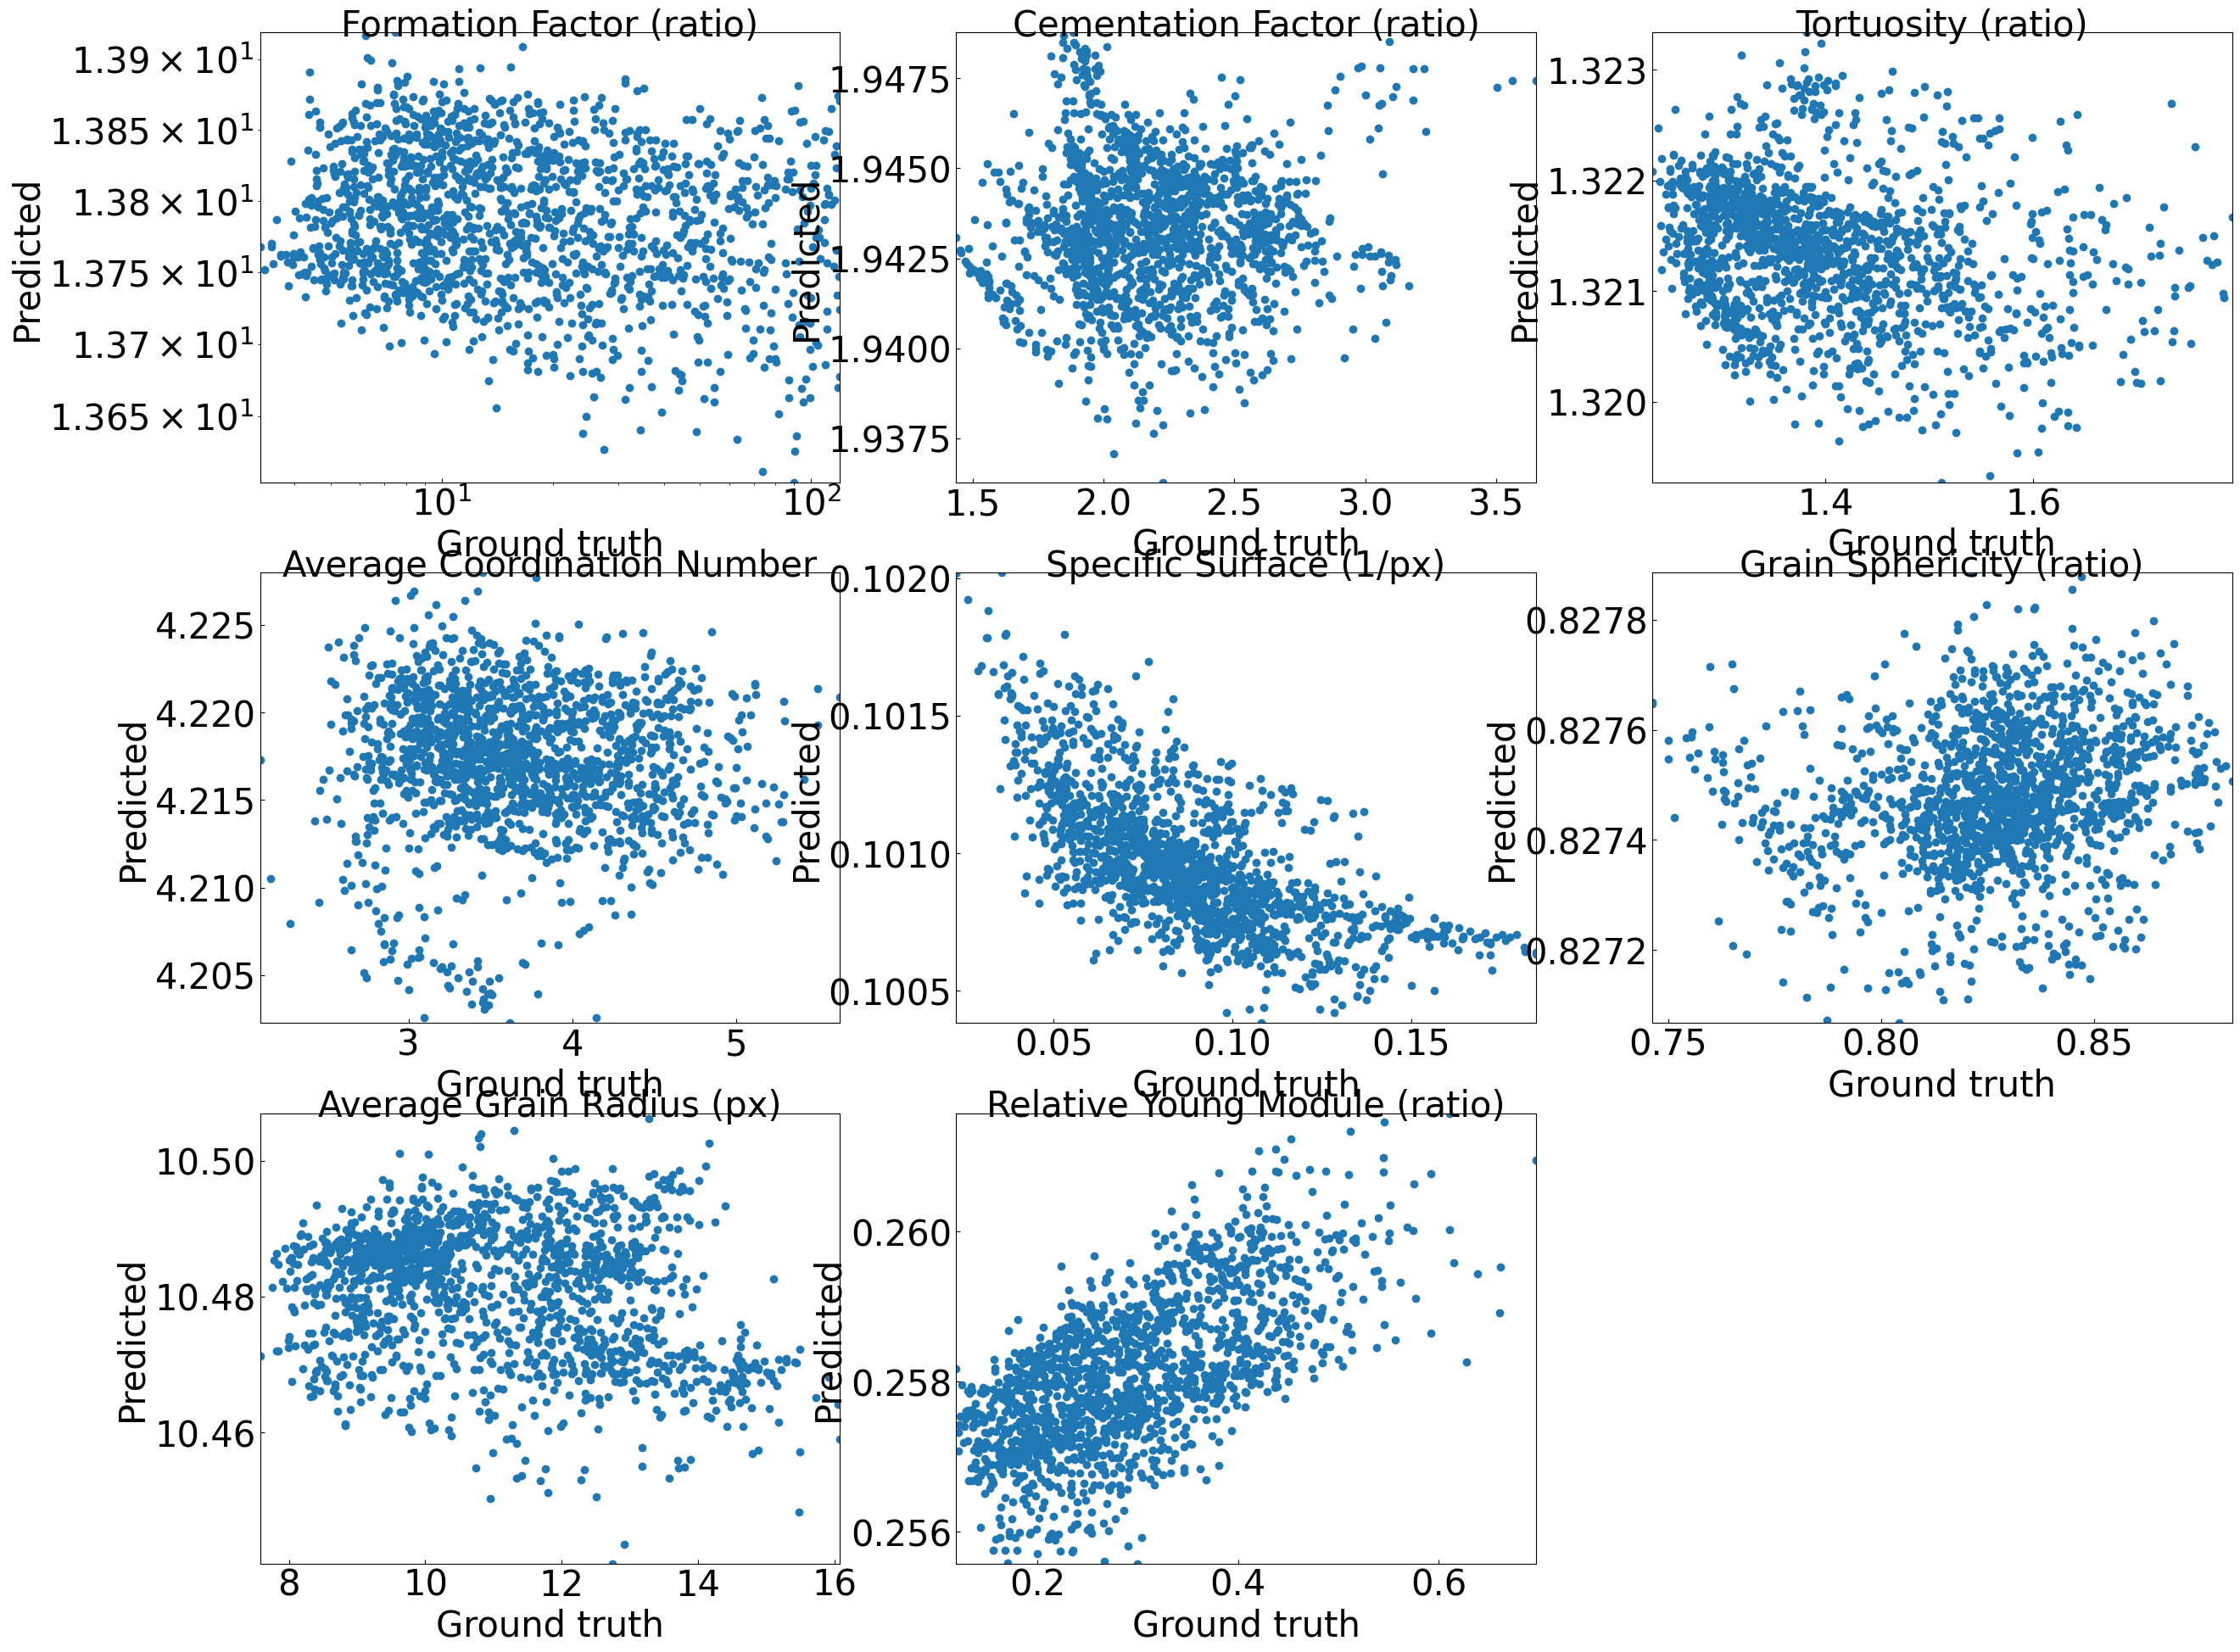

In [4]:
# testing correlated group 2 - 6 slices
group_2 = [2,3,5,6,11,13,14,15,19,27,28,29,30]
# iterate through subtracting 1 from each
group_2 = [x-1 for x in group_2]


List=dpr.prep(dataset_2, 2, properties=group_2)
TrainList, EvalList, TestList = dpr.splitdata(List)

model=dpr.trainmodel(dataset_2,TrainList,EvalList,retrain=1,epochs=50,batch_size=100,ModelType=3, n=2, properties=group_2)
dpr.testmodel(model,dataset_2,TestList,n=2, properties=group_2)
group_2 = [2,3,5,6,11,13,14,15,19,27,28,29,30]

properties = [x-1 for x in group_2]
num_properties = 8 + (100*5)

model = dpr.loadmodel(ModelType=3, properties=num_properties,n=2)

A=dpr.feedsampledata(FileName="/content/drive/MyDrive/hb-final-project/Data/Sample_large.mat", n=2)

#dpr.show_feature_maps(A,n=2)

all_preds=dpr.predict(model, A, n=2, res=4.8, properties=properties)
dpr.prettyresult(all_preds,'correlated_2_results_50epoch_6slice.txt',properties=properties)

